# **Understanding Music Success: A Data-Driven Analysis for Recomendation Systems**



# **Introduction**


The music industry faces a critical challenge in predicting and understanding what makes songs successful. With over 100 million tracks on Spotify and 60,000 new songs uploaded daily, artists and producers need data-driven insights to stand out in an increasingly crowded market. While musical success has traditionally been viewed as subjective and unpredictable, modern streaming platforms like Spotify now provide detailed metrics about songs’ audio characteristics and performance, enabling quantitative analysis of success factors.


## **1.1 Explaining the Problem Statement**

In the ever-expanding music industry, the success of songs and artists often hinges on effective recommendation systems that enhance user discovery. Our analysis seeks to address three critical aspects of recommendation systems:

* Can a music recommendation system, using clustering of song features, provide diverse and randomized song suggestions within the same cluster?
* Can keywords and musical features broaden users' musical tastes beyond their current preferences?
* Can a music recommendation system, leveraging artist collaboration networks and song features, uncover meaningful connections and enhance discovery?

These questions are vital as they target the limitations of current systems, such as repetitive suggestions, and explore pathways to expand diversity and depth in music discovery. Addressing these challenges not only benefits listeners but also supports artists by fostering broader audience reach.

## **1.2 Approach to Address the Problem Statements**

To tackle these questions, we employ a data-driven methodology using a Spotify dataset containing 21 variables across 114,000 records. This dataset includes attributes related to musical characteristics, artist collaborations, and track metadata.

* **Question 1:**  use K-Means clustering to group tracks based on two sets of highly correlated musical features, work with top 'n' popular genres to recommend songs for the user input randomly from within the clusters

* **Question 2:** will involve natural language processing (NLP) to extract keywords from track descriptions, combined with musical features, to develop models that encourage users to explore beyond their usual preferences.

* **Question 3:** will integrate graph-based techniques for artist collaboration networks alongside stylistic analysis to suggest artists with meaningful connections.


## **1.3 Proposed Analytic Techniques**

We propose the following techniques to address each question:

* **Question 1:**

*K-MeansClustering:*
Using K-means clustering with highly correlated musical features such as danceability, energy, and valence, we grouped songs into meaningful clusters. This clustering allowed us to break genre boundaries and focus on musical patterns, enhancing diversity in recommendations.

*Elbow Method for Optimal Clusters:*
The elbow method was applied to determine the optimal number of clusters. It revealed that 3 or 4 clusters strike the right balance between granularity and interpretability, allowing the model to group tracks efficiently while avoiding overfitting.

*Randomized Recommendations:*
The system successfully suggested randomized songs from clusters, ensuring diversity in recommendations while maintaining relevance to the input song's features. By avoiding genre bias, this approach expanded user discovery beyond traditional genre-based systems.

* **Question 2:**

These below techniques balance familiarity and exploration, helping users discover new music without losing relevance.

*Cosine Similarity* :
Compare musical features and song keywords to find tracks that are both similar and exploratory, encouraging broader discovery.


*Principal Component Analysis (PCA)* :
Simplify high-dimensional musical features to uncover meaningful patterns for efficient recommendations.

*TF-IDF* :
Identify unique and important keywords in song descriptions to highlight tracks with fresh and diverse elements.

* **Question 3:**

It follows a multi-step approach:

*Artist Profile Creation* : Calculate average musical features, genres, and popularity for each artist.

*Collaboration Network Construction* : Build a weighted graph of artist collaborations.

*Similarity Matrix Calculation* : Compute cosine similarity between artists' musical feature profiles.

*Recommendation Techniques* :
Collaboration-based recommendations using the network.
Style-based recommendations using musical similarity.
Genre-based recommendations using genre alignment.
Comprehensive recommendations that combine all approaches.



## **1.4 Value of the Analysis**

Our analysis will provide actionable insights for listeners, music platforms, and artists:

For listeners, it offers enhanced discovery by introducing genre diversity, suggesting fresh music beyond their current tastes, and uncovering interconnected artists they might enjoy.
For music platforms, the findings can refine recommendation algorithms, driving user satisfaction and retention.
For artists, it improves visibility, especially for those in less mainstream genres or collaborative networks, fostering equitable promotion.




# **Data Preparation**


Data cleaning and preparation is an important step as it explains where the dataset was obtained, how it was cleaned and prepared to do multiple types of analysis. By using descriptive statistics codes on the dataset, it quickly showed multiple missing values, data entry error of unknown values, skewed numerical values, and high level out outliers. The primary goal was to ensure data quality, relevance, and consistency by handling missing values and most outliers, removing duplicates, removing irrelevant information, filtering data, and more



This dataset is designed to analyze music trends including features of  the songs (tempo, popularity, genre, and more). The original purpose of the data is to track develop a recommendation system that suggests tracks based on user preferences or input. It can also be used for classification tasks, categorizing music based on audio features and genres.



## **Data Source**
The data was obtained from Hugging Face, an open-source platform specializing in natural language processing (NLP) and machine learning (ML).  The dataset, titled **'dataset.csv'** is hosted on the 'spotify-tracks-dataset' webpage, created by maharshipandya. It is publicly available for anyone to  use.   This dataset includes Spotify tracks from 125 different genres, with each track being linked to various musical attributes such as danceability, energy, tempo, and more.

**Original Source Citation**

Spotify. (2024). Spotify Track Audio Features API. Retrieved from https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features

## **Dataset Variables and Entries**

The dataset originally contained 21 variables, such as:
*   Unnamed: 0
*   track_id
*   artists
*   album_name
*   track_name
*   popularity
*   duration_ms   
*   explicit
*   danceability
*   energy
*   key
*   loudness
*   mode
*   speechiness
*   acousticness
*   instrumentalness
*   liveness
*   valence
*   tempo
*   time_signature
*   track_genre


# **Data Cleaning**
 These are the steps taken to clean and prepare the dataset for analysis.


## IMPORT MULTIPLE LIBRARIES AND ANALYSIS


In [52]:

# Basic Data Processing and Analysis
import pandas as pd
import numpy as np
import re
import random

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

# For interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Libraries
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Advanced ML Models
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Natural Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install unidecode
import unidecode

# Network Analysis
import networkx as nx

# System and Settings
import warnings
warnings.filterwarnings('ignore')

# Display Settings
pd.set_option('display.max_columns', None)

# Set basic plotting styles
sns.set_theme()
plt.style.use('default')

# For Plotly in Colab
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Print versions for reference
import sys
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Tensorflow version: {tf.__version__}")
print(f"Scikit-learn version: {sklearn_version}")

# For NLP problem statement
import nltk
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Python version: 3.10.12
Pandas version: 2.2.2
Numpy version: 1.26.4
Tensorflow version: 2.17.1
Scikit-learn version: 1.5.2


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



##IMPORTING DATASET

In [53]:
# Importing dataset: a button named "choose files" will appear.  click on the button and choose our dataset called "dataset.csv"
from google.colab import files
uploaded = files.upload()

# After uploading, read the file
df_original = pd.read_csv(next(iter(uploaded)), encoding='utf-8')

Saving dataset.csv to dataset (1).csv


##REVIEW DESCRIPTIVE STATISTICS


*  Reviewing .describe() its seen that there are 114,000 rows
*  Reviewing .info() there are some missing values.



In [54]:
#Create a new dataframe by copying the original dataframe.
df_v1 = df_original.copy()
#Review 10 rows of the dataframe
df_v1.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [55]:
#Get the statiscal numerical summary of all columns
display(df_v1.describe())
#Get a list of all variables, number of counts on each variable and datatype
display(df_v1.info())

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

None

## REMOVING IRRELEVANT VARIABLES AND ENTRIES


*  The following variables were deemed irrelevant to the analysis and were removed: Unnamed: 0, album_name, key, mode, time_signature, liveness
*  With the Unnamed: 0 removal more duplicates can be found.



In [56]:
#Creating a new dataframe
df_v2_remove_vars = df_v1.copy()
#Removing variables that are irrelevant
df_v2_remove_vars = df_v2_remove_vars.drop(columns=['track_id', 'Unnamed: 0', 'album_name', 'key', 'mode', 'time_signature', 'liveness'])
df_v2_remove_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   track_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   loudness          114000 non-null  float64
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  track_genre       114000 non-null  object 
dtypes: bool(1), float64(8), int64(2), object(3)
memory usage: 11.4+ MB


In [57]:
#Creating a new dataframe
df_v2_rem_pop_0 = df_v2_remove_vars.copy()
#Removing rows that have 0 popularity as it is  not need for our analysis
df_v2_rem_pop_0 =df_v2_rem_pop_0[df_v2_rem_pop_0['popularity'] != 0]
df_v2_rem_pop_0.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,97980.000000,9.798000e+04,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000,97980.000000
mean,38.673127,2.303934e+05,0.565668,0.645716,-8.265888,0.086405,0.310722,0.164786,0.468711,122.682976
std,19.201246,1.106935e+05,0.172703,0.250406,4.987856,0.110205,0.329796,0.316083,0.258619,29.963442
min,1.000000,2.426600e+04,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.754480e+05,0.456000,0.475000,-10.057000,0.035900,0.014700,0.000000,0.254000,99.966000
50%,39.000000,2.153820e+05,0.578000,0.687000,-7.071000,0.049000,0.167000,0.000060,0.455000,122.743500
75%,53.000000,2.653730e+05,0.693000,0.858000,-5.027000,0.085600,0.589000,0.072725,0.675000,141.091000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000


##REMOVING DUPLICATES


In [58]:
#Creating a new dataframe
df_v3_row_duplicate = df_v2_rem_pop_0.copy()
#Review duplicates True = number of duplicates
df_v3_row_duplicate = df_v3_row_duplicate.duplicated()
display(df_v3_row_duplicate.value_counts())

#Creating a new dataframe
df_v3_rem_duplicate = df_v2_rem_pop_0.copy()
#dropping duplicates
df_v3_rem_duplicate = df_v3_rem_duplicate.drop_duplicates()
display(df_v3_rem_duplicate.describe())

#final check for duplicates
display(df_v3_rem_duplicate.isnull().sum())


,count
False,97149
True,831


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,97149.000000,9.714900e+04,97149.000000,97149.000000,97149.000000,97149.000000,97149.000000,97149.000000,97149.000000,97149.000000
mean,38.917796,2.304912e+05,0.565357,0.645813,-8.265248,0.086398,0.310788,0.165148,0.468216,122.706227
std,19.039873,1.099688e+05,0.172486,0.250330,4.977194,0.110367,0.329766,0.316265,0.258611,29.945569
min,1.000000,2.426600e+04,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.754560e+05,0.456000,0.475000,-10.058000,0.035800,0.014500,0.000000,0.254000,99.972000
50%,39.000000,2.154340e+05,0.578000,0.687000,-7.075000,0.049000,0.167000,0.000060,0.454000,122.840000
75%,53.000000,2.655990e+05,0.692000,0.858000,-5.032000,0.085400,0.589000,0.074500,0.674000,141.086000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,0.995000,243.372000


,0
artists,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0


##DEFINING BINS FOR A VARIABLE


*   Variable Category has been split into three and labeled as low, medium, and high



In [59]:
#Creating a New DataFrame:
df_v4_tempo_label = df_v3_rem_duplicate.copy()

# Define bins for categorizing tempo
bins = [df_v4_tempo_label['tempo'].min() - 1, 60, 120, df_v4_tempo_label['tempo'].max() + 1]
labels = ['low', 'medium', 'high']

# Create the tempo_category column
df_v4_tempo_label['tempo_category'] = pd.cut(df_v4_tempo_label['tempo'], bins=bins, labels=labels)

#Display the updated DataFrame
columns_to_check = ['tempo_category', 'tempo']
for column in columns_to_check:
    unique_values = df_v4_tempo_label[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'tempo_category': ['medium', 'high', 'low']
Categories (3, object): ['low' < 'medium' < 'high']
Unique values in 'tempo': [ 87.917  77.489  76.332 ...  85.239 132.378  79.198]


##TIME CONVERSION FOR DURATION TIME

In [60]:
#Creating a New DataFrame:
df_v5_replace_duration_to_min = df_v4_tempo_label.copy()

# Replace 'duration_ms' with its equivalent in minutes
df_v5_replace_duration_to_min['duration_ms'] = (df_v5_replace_duration_to_min['duration_ms'] / 60000)

# Rename the column to reflect the new unit
df_v5_replace_duration_to_min.rename(columns={'duration_ms': 'duration_mins'}, inplace=True)

df_v5_replace_duration_to_min.head(5)

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category
0,Gen Hoshino,Comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.715,87.917,acoustic,medium
1,Ben Woodward,Ghost - Acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.267,77.489,acoustic,medium
2,Ingrid Michaelson;ZAYN,To Begin Again,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.120,76.332,acoustic,medium
3,Kina Grannis,Can't Help Falling In Love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.143,181.740,acoustic,high
4,Chord Overstreet,Hold On,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.167,119.949,acoustic,medium


##TEXT DATA PROCESSING

In [61]:
#Creating a New DataFrame:
df_v6_lowercase = df_v5_replace_duration_to_min.copy()

#Convert to lowercase
df_v6_lowercase = df_v6_lowercase.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_v6_lowercase

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,medium
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,medium
2,ingrid michaelson;zayn,to begin again,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,acoustic,medium
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,high
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,sleep my little boy,21,6.416650,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,high
113996,rainy lullaby,water into light,22,6.416667,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,medium
113997,cesária evora,miss perfumado,22,4.524433,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,high
113998,michael w. smith,friends,41,4.731550,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,high


In [62]:
#Creating a New DataFrame:
df_v6_charchg = df_v6_lowercase.copy()

#Remove special characters, numbers, non-ascii,and punctuation
def find_non_ascii_except_extended_latin_and_text(text):
    # Remove allowed special characters from the text
    text = re.sub(r"[()\[\]{}<>_\-]", "", str(text))
    # Check for characters outside the extended Latin range
    for char in text:
        if ord(char) > 255:  # Check for non-ASCII characters
            return True  # Found a non-allowed character
    return False  # All characters are within the allowed range

# from the dataframe get columns
columns_to_check = ['track_name', 'artists']

# Apply the function to the specified columns
for column in columns_to_check:
    df_v6_charchg[f'{column}_non_ascii_check'] = df_v6_charchg[column].apply(find_non_ascii_except_extended_latin_and_text)

# Filter rows based on the checks in both columns
filtered_rows = df_v6_charchg[
    (df_v6_charchg['track_name_non_ascii_check']) | (df_v6_charchg['artists_non_ascii_check'])
]

# Print or further process the filtered rows
print(filtered_rows)

                                           artists  \
51                                   motohiro hata   
106                             mone kamishiraishi   
107                                     john adams   
110                                   boyce avenue   
115                                   boyce avenue   
...                                            ...   
113548  hillsong worship;benjamin william hastings   
113555                      housefires;kirby kaple   
113856                           колыбельная-земля   
113949                               cesária evora   
113969                   bethel music;molly skaggs   

                         track_name  popularity  duration_mins  explicit  \
51                          透明だった世界          61       3.872667     False   
106            なんでもないや - movie ver.          49       5.832000     False   
107     you’re beautiful - acoustic          55       3.416217     False   
110      can’t help falling in love          57

In [63]:
#Removing non ascii except extended latin and text
df_v6_rem_duplicate = df_v6_charchg.drop(filtered_rows.index)

#Remove the temporary 'track_name_non_ascii_check', 'artists_non_ascii_check' columns
df_v6_rem_duplicate = df_v6_rem_duplicate.drop(columns=['track_name_non_ascii_check', 'artists_non_ascii_check'])
df_v6_rem_duplicate

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,medium
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,medium
2,ingrid michaelson;zayn,to begin again,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,acoustic,medium
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,high
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,sleep my little boy,21,6.416650,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,high
113996,rainy lullaby,water into light,22,6.416667,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,medium
113997,cesária evora,miss perfumado,22,4.524433,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,high
113998,michael w. smith,friends,41,4.731550,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,high


In [64]:
#Creating a New DataFrame:
df_v6_replace_spcl_char = df_v6_rem_duplicate.copy()

#Changing other special characters to complete words
special_chars = {
    "@": "a",
    "$": "s",
    "&": "and",
    "w.": "with",
    "?": "",
    '"': "",
    '#': "",
    '%': "",
    '()': "",
    "!": ""
}
def replace_characters(input_string, special_chars):
  for orig_char, repl_char in special_chars.items():
    input_string = input_string.replace(orig_char, repl_char)
  return input_string

df_v6_replace_spcl_char['track_name'] = df_v6_replace_spcl_char['track_name'].apply(lambda x: replace_characters(x, special_chars))
df_v6_replace_spcl_char['artists'] = df_v6_replace_spcl_char['artists'].apply(lambda x: replace_characters(x, special_chars))



##TOKENIZE

In [65]:
df_v6_token = df_v6_replace_spcl_char.copy()

def tokenize_text(text):
    """Tokenizes text by removing punctuation, stop words, and converting to lowercase."""

    # 1. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 2. Tokenize the text
    tokens = word_tokenize(text)

    # 3. Remove stop words and convert to lowercase
    tokens = stopwords.words('english')

    return tokens

# Apply the function to the desired text column in your DataFrame
df_v6_token['track_name_tk'] = df_v6_token['track_name'].apply(tokenize_text)
df_v6_token['artists_tk'] = df_v6_token['artists'].apply(tokenize_text)
df_v6_token

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category,track_name_tk,artists_tk
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
2,ingrid michaelson;zayn,to begin again,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,sleep my little boy,21,6.416650,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113996,rainy lullaby,water into light,22,6.416667,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113997,cesária evora,miss perfumado,22,4.524433,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113998,michael with smith,friends,41,4.731550,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."


In [66]:
df_v9_clean_df = df_v6_token.copy()
df_v9_clean_df

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category,track_name_tk,artists_tk
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
2,ingrid michaelson;zayn,to begin again,57,3.513767,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,sleep my little boy,21,6.416650,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113996,rainy lullaby,water into light,22,6.416667,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,medium,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113997,cesária evora,miss perfumado,22,4.524433,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."
113998,michael with smith,friends,41,4.731550,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,high,"[i, me, my, myself, we, our, ours, ourselves, ...","[i, me, my, myself, we, our, ours, ourselves, ..."


## AGGREGATING BY GENRE


*   There are duplicated songs in the entries with the same numerical with duplicated values if not aggregated then analysis can be skewed when using the numerical variables



In [67]:
#AGGREGATING:  HAVE GENRE INTO LISTS/grouped

# Convert list columns to tuples for hashing
df_v9_clean_df['track_name_tk'] = df_v9_clean_df['track_name_tk'].apply(tuple)
df_v9_clean_df['artists_tk'] = df_v9_clean_df['artists_tk'].apply(tuple)

# Convert list columns to tuples for hashing
df_v11_genre_list = df_v9_clean_df.groupby(['track_name',	'artists',	'popularity',	'duration_mins',
                            'danceability',	'explicit',	'energy',	'loudness',
                            'speechiness',	'acousticness','valence',	'tempo', 'track_name_tk', 'artists_tk'])['track_genre'].agg(list).reset_index()
df_v11_genre_list.to_csv('dataset_agg_genre.csv', index=False)
df_v11_genre_list

,track_name,artists,popularity,duration_mins,danceability,explicit,energy,loudness,speechiness,acousticness,valence,tempo,track_name_tk,artists_tk,track_genre
0,,enygma rapper,44,5.413500,0.463,False,0.756,-7.755,0.0590,0.23900,0.549,146.952,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[r-n-b]
1,1,slank,37,4.698117,0.386,False,0.414,-7.771,0.0290,0.00182,0.180,126.220,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[blues]
2,'49 mercury blues,the brian setzer orchestra,26,2.846667,0.437,False,0.947,-4.537,0.1490,0.02400,0.740,184.249,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[rockabilly]
3,'74-'75,the connells,67,4.649550,0.530,False,0.590,-9.169,0.0250,0.18300,0.430,144.202,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...","[j-pop, j-rock]"
4,'74: no,the magnetic fields,21,2.940433,0.275,False,0.439,-8.169,0.0281,0.89500,0.406,150.660,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[club]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75342,üryan geldim,cem karaca;kardaslar,38,4.294433,0.487,False,0.629,-11.938,0.0624,0.03160,0.678,93.101,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...","[psych-rock, turkish]"
75343,ütopyalar güzeldir,ceylan ertem,35,2.504000,0.421,False,0.283,-14.307,0.0520,0.80700,0.630,76.403,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[j-rock]
75344,üzgünüm anne,tepki,38,2.986667,0.655,False,0.637,-8.099,0.1850,0.46900,0.371,171.921,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[turkish]
75345,þann svartís,arckanum,16,4.113767,0.234,False,0.929,-3.059,0.0818,0.00000,0.100,155.577,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",[black-metal]


##Standardization


1.   First type: df_v10_clean_standard (non-aggregated by genre)
2.   Second type: df_v12_genre_list_standard (aggredated by genre)



In [68]:
# Create a copy of the original dataframe
df_v10_clean_standard = df_v9_clean_df.copy()

# Initialize the scaler
scaler = StandardScaler()

# List of features to standardize
features_to_standardize = [
    'popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'valence',
    'tempo'
]

# Create new standardized columns with '_std' suffix
for feature in features_to_standardize:
    # Reshape data for StandardScaler
    feature_reshaped = df_v10_clean_standard[feature].values.reshape(-1, 1)
    # Fit and transform the data
    feature_standardized = scaler.fit_transform(feature_reshaped)
    # Add new standardized column
    df_v10_clean_standard[f'{feature}_std'] = feature_standardized

# Verify the standardization
print("Verification of standardized features:")
print("\nMean should be close to 0 and std should be close to 1:")
for feature in features_to_standardize:
    print(f"\n{feature}_std:")
    print(f"Mean: {df_v10_clean_standard[f'{feature}_std'].mean():.6f}")
    print(f"Std: {df_v10_clean_standard[f'{feature}_std'].std():.6f}")

Verification of standardized features:

Mean should be close to 0 and std should be close to 1:

popularity_std:
Mean: -0.000000
Std: 1.000005

danceability_std:
Mean: 0.000000
Std: 1.000005

energy_std:
Mean: 0.000000
Std: 1.000005

loudness_std:
Mean: -0.000000
Std: 1.000005

speechiness_std:
Mean: 0.000000
Std: 1.000005

acousticness_std:
Mean: 0.000000
Std: 1.000005

valence_std:
Mean: -0.000000
Std: 1.000005

tempo_std:
Mean: 0.000000
Std: 1.000005


In [69]:
# Create a copy of the original dataframe
df_v12_genre_list_standard = df_v11_genre_list.copy()

# Initialize the scaler
scaler = StandardScaler()

# List of features to standardize
features_to_standardize = [
    'popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'valence',
    'tempo'
]

# Create new standardized columns with '_std' suffix
for feature in features_to_standardize:
    # Reshape data for StandardScaler
    feature_reshaped = df_v12_genre_list_standard[feature].values.reshape(-1, 1)
    # Fit and transform the data
    feature_standardized = scaler.fit_transform(feature_reshaped)
    # Add new standardized column
    df_v12_genre_list_standard[f'{feature}_std'] = feature_standardized

# Verify the standardization
print("Verification of standardized features:")
print("\nMean should be close to 0 and std should be close to 1:")
for feature in features_to_standardize:
    print(f"\n{feature}_std:")
    print(f"Mean: {df_v12_genre_list_standard[f'{feature}_std'].mean():.6f}")
    print(f"Std: {df_v12_genre_list_standard[f'{feature}_std'].std():.6f}")

Verification of standardized features:

Mean should be close to 0 and std should be close to 1:

popularity_std:
Mean: 0.000000
Std: 1.000007

danceability_std:
Mean: -0.000000
Std: 1.000007

energy_std:
Mean: 0.000000
Std: 1.000007

loudness_std:
Mean: 0.000000
Std: 1.000007

speechiness_std:
Mean: -0.000000
Std: 1.000007

acousticness_std:
Mean: -0.000000
Std: 1.000007

valence_std:
Mean: 0.000000
Std: 1.000007

tempo_std:
Mean: 0.000000
Std: 1.000007


# **Exploratory and Predictive Data Analysis Question 1**

**Question 1:** Can a music recommendation system, using clustering of song features, provide diverse and randomized song suggestions within the same cluster?

In [70]:
#Creating a dataframe with individual artists
df_rem_art_colab = df_v10_clean_standard.copy()
df_rem_art_colab = df_rem_art_colab[~df_rem_art_colab['artists'].str.contains(';')] # filter for rows where the 'artist' column does not contain ';'
df_rem_art_colab

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category,track_name_tk,artists_tk,popularity_std,danceability_std,energy_std,loudness_std,speechiness_std,acousticness_std,valence_std,tempo_std
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.763862,0.627075,-0.745048,0.310778,0.488265,-0.834603,0.948906,-1.156301
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",0.829383,-0.840457,-1.922773,-1.780158,-0.104217,1.868828,-0.770119,-1.504651
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,acoustic,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.660031,-1.723268,-2.347552,-2.035320,-0.459528,1.811230,-1.245921,1.977879
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",2.231102,0.294587,-0.816909,-0.274302,-0.314739,0.489526,-1.153830,-0.086264
5,tyrone wells,days i will remember,58,3.570667,False,0.688,0.4810,-8.807,0.1050,0.2890,0.000000,0.6660,98.017,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",0.985130,0.695865,-0.665202,-0.100074,0.150719,-0.056132,0.760888,-0.818908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,rainy lullaby,sleep my little boy,21,6.416650,False,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,world-music,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",-0.935743,-2.262128,-1.647305,-1.612309,-0.407120,1.007901,-1.664550,0.115704
113996,rainy lullaby,water into light,22,6.416667,False,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,world-music,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",-0.883828,-2.250662,-2.118395,-1.996049,-0.425774,2.081028,-1.660329,-1.245760
113997,cesária evora,miss perfumado,22,4.524433,False,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,world-music,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",-0.883828,0.357645,-1.272030,-0.516307,-0.408897,1.696036,1.056345,0.328930
113998,michael with smith,friends,41,4.731550,False,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,world-music,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",0.102567,0.116878,-0.565395,-0.515111,-0.518155,0.222760,-0.209901,0.448587


In [71]:
#New Dataframe
df_top_30 = df_rem_art_colab.copy()

# Group by genre and calculate sum of popularity

genre_popularity = df_top_30.groupby('track_genre')['popularity'].sum().reset_index()
genre_popularity.columns = ['track_genre', 'total_popularity']

# Sort by total popularity in descending order
genre_popularity = genre_popularity.sort_values(by='total_popularity', ascending=False)

# Get the top N genres (you can adjust N as needed)
top_n = 30  # Example: Get the top 30 genres
top_genres = genre_popularity.head(top_n)['track_genre'].tolist()

# Create a new DataFrame with only the top genres
df_individualart = df_top_30[df_top_30['track_genre'].isin(top_genres)]

# Display the new DataFrame
df_individualart

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category,track_name_tk,artists_tk,popularity_std,danceability_std,energy_std,loudness_std,speechiness_std,acousticness_std,valence_std,tempo_std
0,gen hoshino,comedy,73,3.844433,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.715,87.917,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.763862,0.627075,-0.745048,0.310778,0.488265,-0.834603,0.948906,-1.156301
1,ben woodward,ghost - acoustic,55,2.493500,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.267,77.489,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",0.829383,-0.840457,-1.922773,-1.780158,-0.104217,1.868828,-0.770119,-1.504651
3,kina grannis,can't help falling in love,71,3.365550,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.143,181.740,acoustic,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.660031,-1.723268,-2.347552,-2.035320,-0.459528,1.811230,-1.245921,1.977879
4,chord overstreet,hold on,82,3.314217,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.167,119.949,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",2.231102,0.294587,-0.816909,-0.274302,-0.314739,0.489526,-1.153830,-0.086264
5,tyrone wells,days i will remember,58,3.570667,False,0.688,0.4810,-8.807,0.1050,0.2890,0.000000,0.666,98.017,acoustic,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",0.985130,0.695865,-0.665202,-0.100074,0.150719,-0.056132,0.760888,-0.818908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102993,the monkees,i'm a believer - 2006 remaster,74,2.789550,False,0.526,0.7750,-6.050,0.0352,0.7070,0.000021,0.962,80.106,songwriter,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.815778,-0.232807,0.508531,0.449522,-0.469300,1.211007,1.896673,-1.417229
102994,eagles,life in the fast lane - 2013 remaster,72,4.770317,False,0.667,0.7550,-7.246,0.0690,0.0966,0.000069,0.883,109.535,songwriter,medium,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.711947,0.575482,0.428685,0.211105,-0.169061,-0.639379,1.593541,-0.434146
102995,blanco white,olalla,66,4.136000,False,0.573,0.4060,-11.946,0.0361,0.6530,0.475000,0.376,130.021,songwriter,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.400454,0.036623,-0.964623,-0.725819,-0.461305,1.047310,-0.351874,0.250194
102996,nina nesbitt,the best you had,60,2.947550,True,0.690,0.5820,-6.259,0.0333,0.3580,0.000000,0.448,122.020,songwriter,high,"(i, me, my, myself, we, our, ours, ourselves, ...","(i, me, my, myself, we, our, ours, ourselves, ...",1.088961,0.707330,-0.261981,0.407859,-0.486177,0.153037,-0.075602,-0.017082


## Correlation Analysis

Correlation analysis is a statistical technique used to measure the strength and direction of relationships between numerical features (variables). The correlation coefficient, typically ranging from -1 to +1, helps understand how one variable changes in relation to another.

The primary objective of correlation analysis is to identify the most relevant musical features for clustering tracks. By analyzing correlations, we can determine which features are strongly related to each other.

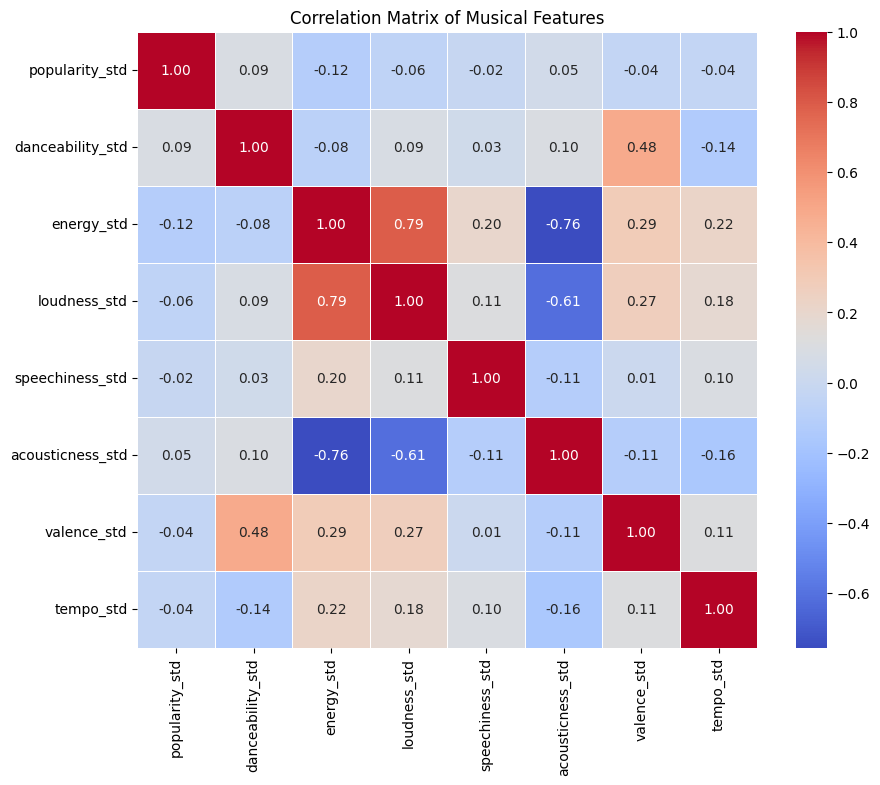

In [72]:
# Select the musical features for correlation analysis
musical_features = ['popularity_std', 'danceability_std', 'energy_std',
                   'loudness_std', 'speechiness_std', 'acousticness_std',
                   'valence_std', 'tempo_std']

# Calculate the correlation matrix
correlation_matrix = df_individualart[musical_features].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Musical Features')
plt.show()


## Elbow Method

The Elbow Method is a technique used to determine the optimal number of clusters in K-means clustering by analyzing the Within-Cluster Sum of Squares (WCSS) and identifying the "elbow point" where the rate of decrease slows down.


Cluster Selection Using the Elbow Method

The Elbow Method was applied to determine the optimal number of clusters for K-means clustering by analyzing the Within-Cluster Sum of Squares (WCSS) across different values of k. The resulting graph revealed a significant decrease in WCSS up to 4 clusters, after which the rate of reduction began to flatten.




In [73]:
# Initialize WCSS list
wcss = []

# Define the features you want to use for clustering
features = df_individualart[['popularity_std', 'danceability_std', 'energy_std', 'loudness_std', 'valence_std', 'tempo_std']] # Example features

# Iterate over a range of cluster numbers (e.g., 1 to 10)
for k in range(1, 11):  # Experiment with a range
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)  # 'features' is your dataset for clustering
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

print(wcss)  # Debugging: See WCSS for each k

[125154.31756763556, 93890.32240523395, 78033.17079452133, 69313.28974670664, 61927.09310923339, 57834.26265438655, 53964.73976140702, 50667.57553015873, 48003.572353626776, 46199.16650344933]


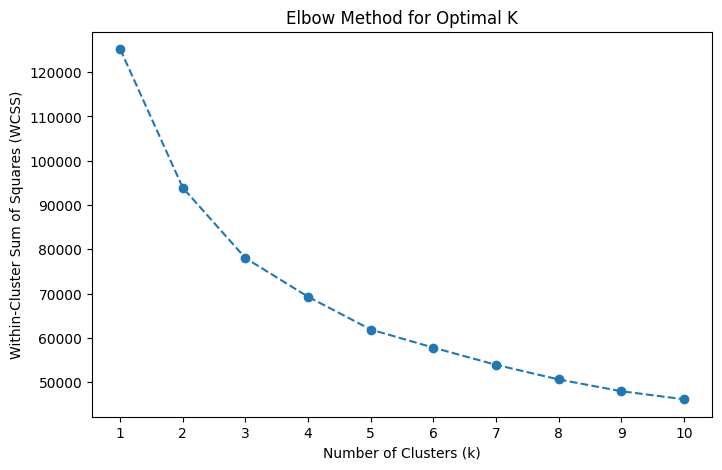

In [74]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.show()

## Rationale for Using 4 Clusters

The decision to use 4 clusters was based on the point where diminishing returns were observed in the WCSS curve. At k = 4, the curve shows a notable "elbow," indicating an optimal balance between minimizing WCSS and ensuring meaningful cluster granularity. This choice ensures that the clusters remain interpretable and effectively group data points without overfitting or excessive fragmentation.

Enter a song name to get recommendations: calm down
Song 'calm down' not found in the dataset.
Do you want to search for another song? (Y/N): dance
Invalid input. Please type 'Y' or 'N'.
Do you want to search for another song? (Y/N): n
Exiting the recommendation system. Thank you!


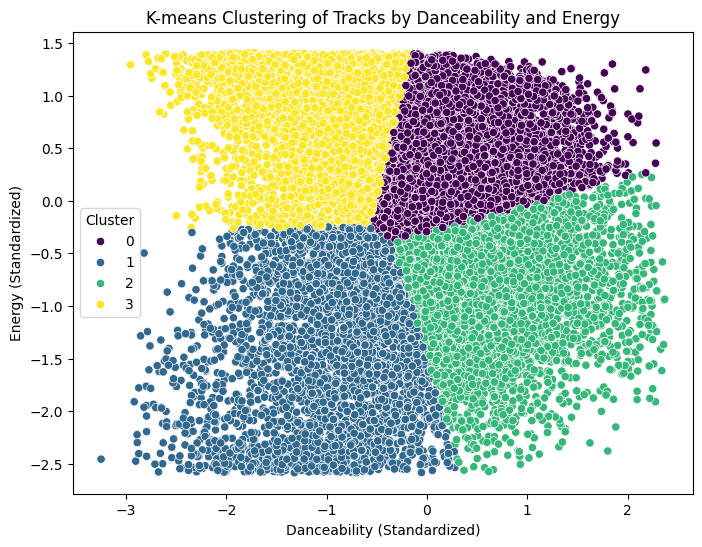

In [75]:
# Prepare features for clustering: danceability_std and energy_std
features = df_individualart[['danceability_std', 'energy_std']]

# Apply K-means clustering with the specified features
kmeans = KMeans(n_clusters=4, random_state=42)
df_individualart['cluster'] = kmeans.fit_predict(features)

# Function to recommend random songs from the same cluster
def recommend_songs_interactive(df):
    first_prompt = True  # Flag to indicate the first prompt

    while True:
        # Prompt the user for the song name
        if first_prompt:
            song_name = input("Enter a song name to get recommendations: ").strip()
            first_prompt = False  # Set the flag to False after the first prompt
        else:
            continue_prompt = input("Do you want to search for another song? (Y/N): ").strip().lower()
            if continue_prompt == 'n':
                print("Exiting the recommendation system. Thank you!")
                break
            elif continue_prompt == 'y':
                song_name = input("Enter another song name: ").strip()
            else:
                print("Invalid input. Please type 'Y' or 'N'.")
                continue

        # Check if the song exists in the DataFrame
        if song_name in df['track_name'].values:
            # Get the cluster, artist, and genre of the original song
            original_song_data = df[df['track_name'] == song_name].iloc[0]
            cluster = original_song_data['cluster']
            original_artist = original_song_data['artists']
            original_genre = original_song_data['track_genre']

            print(f"\nOriginal Song Information:")
            print(f"Track Name: {song_name}")
            print(f"Artist: {original_artist}")
            print(f"Genre: {original_genre}")
            print(f"Cluster: {cluster}")

            # Get recommendations from the same cluster
            recommendations = df[df['cluster'] == cluster][['track_name', 'artists', 'track_genre']]
            recommendations = recommendations[recommendations['track_name'] != song_name]  # Exclude the original song

            if not recommendations.empty:
                print("\nRecommended Songs:")
                print(recommendations.sample(min(5, len(recommendations))))  # Return up to 5 random recommendations
            else:
                print("No recommendations available in the same cluster.")
        else:
            print(f"Song '{song_name}' not found in the dataset.")

# Example usage
recommend_songs_interactive(df_individualart)

# Visualize the K-means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='danceability_std',
    y='energy_std',
    hue='cluster',
    palette='viridis',
    data=df_individualart
)
plt.title("K-means Clustering of Tracks by Danceability and Energy")
plt.xlabel('Danceability (Standardized)')
plt.ylabel('Energy (Standardized)')
plt.legend(title="Cluster")
plt.show()

### **Cluster Analysis for Danceability and Energy**

The K-means clustering of tracks using **Danceability (Standardized)** and **Energy (Standardized)** reveals four distinct clusters:

1. **Cluster 0 (Purple)**:
   - Tracks with **high energy** and **moderate to high danceability**.
   - These are likely energetic and lively songs, such as those suited for parties or workout playlists.

2. **Cluster 1 (Teal)**:
   - Tracks with **moderate energy** and **high danceability**.
   - These songs are likely rhythmic and enjoyable but less intense, suitable for casual listening or dance-focused playlists.

3. **Cluster 2 (Blue)**:
   - Tracks with **low energy** and **low to moderate danceability**.
   - These are calmer or slower tracks, such as acoustic or relaxing songs that lack intense beats.

4. **Cluster 3 (Yellow)**:
   - Tracks with **high danceability** but **moderate energy**.
   - These are likely upbeat and groovy tracks, offering a balance of energy and rhythm without being overly intense.

### **Insights**:
- The clustering effectively groups songs based on their energetic intensity and rhythmic attributes.
- These clusters provide a meaningful foundation for recommending diverse tracks within similar feature ranges, enhancing user discovery and playlist curation.

# **Exploratory and Predictive Data Analysis Question 2**

**Research Question:** Can keywords and musical features help broaden users musical tastes beyond their existing recommendation system?

There are complex and better recommendations system and analysis out that that provides users beyond the traditional recommendation system that only recommends the same songs from the same artist and genre. The analysis provided will broaded the users knowledge of old and new artists and different types of genre's by using track_name as the target variable and musical features. Within these analysis extra data preperation are needed.


##REDUCE THE DATA


*   The data is too large and running the code in google colab connection either will crash or disconnect.  
*   Reduced the data down to 10,000



In [76]:
#Create new Dataset
df_reduced10000 = df_v10_clean_standard.copy()

#Reducing the datadown to 10000
# Number of rows needed in total
target_rows = 10000

# Number of groups for equal split
unique_combinations = df_reduced10000.groupby(['popularity', 'track_genre']).ngroups
rows_per_group = target_rows // unique_combinations

# Sample rows evenly from each group
balanced10000_df = df_reduced10000.groupby(['popularity', 'track_genre', 'loudness', 'energy', 'danceability',	'acousticness',	'valence',	'tempo'	]).apply(lambda x: x.sample(min(len(x), rows_per_group))).reset_index(drop=True)

# If the dataset doesn't sum up to exactly 10,000 rows, trim or add samples as needed
if len(balanced10000_df) > target_rows:
    balanced10000_df = balanced10000_df.sample(target_rows)
elif len(balanced10000_df) < target_rows:
    extra_rows_needed = target_rows - len(balanced10000_df)
    additional_rows = df_reduced10000.sample(extra_rows_needed, random_state=1)
    balanced10000_df = pd.concat([balanced10000_df, additional_rows])

# Save the reduced dataset
balanced10000_df.to_csv('df_reduced10000.csv', index=False)


In [77]:
df_keyword = pd.read_csv("df_reduced10000.csv")
df_keyword

,artists,track_name,popularity,duration_mins,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,tempo_category,track_name_tk,artists_tk,popularity_std,danceability_std,energy_std,loudness_std,speechiness_std,acousticness_std,valence_std,tempo_std
0,porter robinson,sad machine,60,5.844833,False,0.470,0.7060,-4.902,0.0322,0.03400,0.000001,0.327,88.519,dubstep,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",1.088961,-0.553829,0.233063,0.678371,-0.495948,-0.829147,-0.539893,-1.136191
1,prateek kuhad,raat raazi,33,4.782600,False,0.481,0.2540,-10.642,0.0307,0.75600,0.372000,0.138,105.418,songwriter,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",-0.312757,-0.490771,-1.571451,-0.465873,-0.509272,1.359547,-1.265106,-0.571676
2,lefties soul connection,it's your thing / hey pocky a-way,19,5.041767,False,0.508,0.8820,-4.505,0.1210,0.03510,0.002640,0.842,170.223,afrobeat,high,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",-1.039574,-0.335993,0.935706,0.757511,0.292844,-0.825812,1.436219,1.593151
3,xxxtentacion,numb the pain,60,1.374500,True,0.683,0.0759,-10.567,0.0320,0.90200,0.000000,0.740,93.186,emo,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",1.088961,0.667202,-2.282478,-0.450922,-0.497724,1.802136,1.044834,-0.980289
4,joel carlo,buteco a luz de velas - ao vivo,50,3.119167,False,0.697,0.7230,-4.680,0.0616,0.35000,0.000000,0.680,113.140,sertanejo,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",0.569806,0.747458,0.300932,0.722625,-0.234794,0.128786,0.814607,-0.313720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,raça negra,tão seu,49,2.863767,False,0.687,0.7510,-6.799,0.0370,0.66400,0.000010,0.518,90.995,pagode,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",0.517891,0.690133,0.412716,0.300212,-0.453310,1.080655,0.192996,-1.053479
9996,luciano,ulterior motive,28,4.180433,False,0.619,0.7430,-8.492,0.2900,0.02510,0.000003,0.669,161.507,dancehall,high,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",-0.572335,0.300320,0.380778,-0.037280,1.794035,-0.856127,0.772399,1.301991
9997,the stranglers,peaches,1,4.118000,False,0.569,0.5770,-9.719,0.0699,0.00877,0.009130,0.961,71.707,synth-pop,medium,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",-1.974053,0.013692,-0.281942,-0.281877,-0.161067,-0.905630,1.892836,-1.697800
9998,sajjan raj vaidya,sasto mutu,54,4.411583,False,0.522,0.5380,-9.408,0.0275,0.70500,0.000007,0.369,156.006,indie-pop,high,"('i', 'me', 'my', 'myself', 'we', 'our', 'ours...","('i', 'me', 'my', 'myself', 'we', 'our', 'ours...",0.777468,-0.255737,-0.437641,-0.219880,-0.537697,1.204944,-0.378734,1.118229


##TF-IDF (Term Frequency-Inverse Document Frequency)

In [78]:
# transform track names into numerical vectors
tfidf_vectorizer = TfidfVectorizer(max_features=500)
track_name_tfidf = tfidf_vectorizer.fit_transform(df_keyword['track_name_tk'])
track_name_tfidf

<10000x145 sparse matrix of type '<class 'numpy.float64'>'
	with 1450000 stored elements in Compressed Sparse Row format>

##NORMALIZE MUSICAL FEATURES


In [79]:
# Normalize musical features
scaler2f = StandardScaler()
num_music2f = ['danceability', 'energy', 'loudness',
                    'acousticness', 'instrumentalness', 'valence', 'tempo']
scaled_features2f = scaler.fit_transform(df_keyword[num_music2f])

# Combine text and numerical features
combined_features2f = hstack([track_name_tfidf, scaled_features2f])
combined_features2f



<10000x152 sparse matrix of type '<class 'numpy.float64'>'
	with 1520000 stored elements in COOrdinate format>

##COSINE SIMILARITY

In [80]:
# Compute cosine similarity
cosine_sim2f = cosine_similarity(combined_features2f, combined_features2f)
cosine_sim2f

array([[ 1.        ,  0.0782123 ,  0.0512719 , ...,  0.43023205,
        -0.19864607,  0.17169345],
       [ 0.0782123 ,  1.        , -0.59772435, ..., -0.16811388,
         0.51471151,  0.49869152],
       [ 0.0512719 , -0.59772435,  1.        , ...,  0.18968505,
         0.16871142,  0.1899361 ],
       ...,
       [ 0.43023205, -0.16811388,  0.18968505, ...,  1.        ,
        -0.35837964,  0.11420014],
       [-0.19864607,  0.51471151,  0.16871142, ..., -0.35837964,
         1.        ,  0.69118753],
       [ 0.17169345,  0.49869152,  0.1899361 , ...,  0.11420014,
         0.69118753,  1.        ]])

##FIRST RECOMMENDATION SYSTEM: NO KEYWORD, RANDOMIZE

1.   Using cosine similarity for track_name and musical features('danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo'). When rerunning the code, most of the time it will recommend within the same musical features however, it can also get skew.





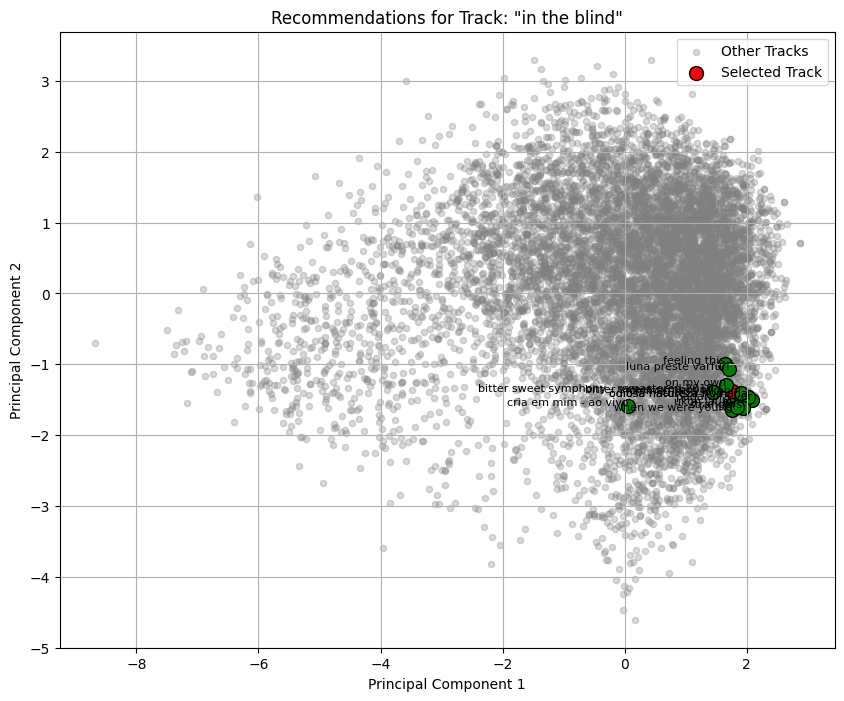


Recommended Tracks:
                                   track_name                     artists  \
5385                               ukon laulu                      lepoka   
1125                                      tvi                  surf curse   
5944                            pagar pra ver                      cpm 22   
3739                   odiosa natureza humana                     matanza   
5276                             feeling this                   blink-182   
1505                   odiosa natureza humana                     matanza   
3262                       when we were young  we the kings;derek sanders   
2542                    bitter sweet symphony                   the verve   
8437                      luna preste varfuri                    bucovina   
8148                                on my own                ashes remain   
2331  bitter sweet symphony - remastered 2016                   the verve   
985                                 strangers        br

In [81]:
# Assuming combined_features2f, cosine_sim2f, and df_keyword are already defined

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(combined_features2f.toarray())

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features2f = pca.fit_transform(standardized_features)

# Recommendation function with random selection within top similar tracks
def recommend_tracks(track_index, top_n=15, sample_n=15):
    # Get similarity scores for the given track
    sim_scores2f = list(enumerate(cosine_sim2f[track_index]))
    sim_scores2f = sorted(sim_scores2f, key=lambda x: x[1], reverse=True)

    # Exclude the track itself (first entry)
    sim_scores2f = sim_scores2f[1:top_n + 1]

    # Randomly sample from the top similar tracks
    sampled_indices = random.sample([i[0] for i in sim_scores2f], k=min(sample_n - 1, len(sim_scores2f)))

    # Add one completely random track to diversify recommendations
    random_track_index = random.choice(df_keyword.index)
    sampled_indices.append(random_track_index)

    return sampled_indices, df_keyword.iloc[sampled_indices][['track_name', 'artists', 'track_genre']]

# Plot recommendations
def plot_recommendations(track_index, top_n=15, sample_n=15):
    # Get random recommendations within top similar tracks
    recommended_indices, recommended_tracks = recommend_tracks(track_index, top_n, sample_n)

    # Plot all tracks in the reduced PCA space
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_features2f[:, 0], reduced_features2f[:, 1], alpha=0.3, label='Other Tracks', color='grey', s=20)

    # Highlight the selected track
    plt.scatter(reduced_features2f[track_index, 0], reduced_features2f[track_index, 1], color='red', label='Selected Track', s=100, edgecolor='black')

    # Highlight recommended tracks and annotate with track names
    for idx in recommended_indices:
        plt.scatter(reduced_features2f[idx, 0], reduced_features2f[idx, 1], color='green', s=100, edgecolor='black')
        plt.text(reduced_features2f[idx, 0], reduced_features2f[idx, 1], df_keyword.loc[idx, 'track_name'], fontsize=8, ha='right')

    # Title, labels, and legend
    plt.title(f'Recommendations for Track: "{df_keyword.loc[track_index, "track_name"]}"')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the recommended tracks
    print("\nRecommended Tracks:")
    print(recommended_tracks)

# Example usage
plot_recommendations(track_index=random.randint(0, len(df_keyword) - 1), top_n=15, sample_n=15)


##FIRST RECOMMENDATION SYSTEM: WITH KEYWORD


*   With the of the keyword, the users have  control the type of songs they want to look at.  Once a keyword is entered it will pick a track that has this keyword in the track_name.  Which ever track it picked, it will find other tracks closest in cosine similarity and recommend these to the users matching musical features instead of genre and artist.    




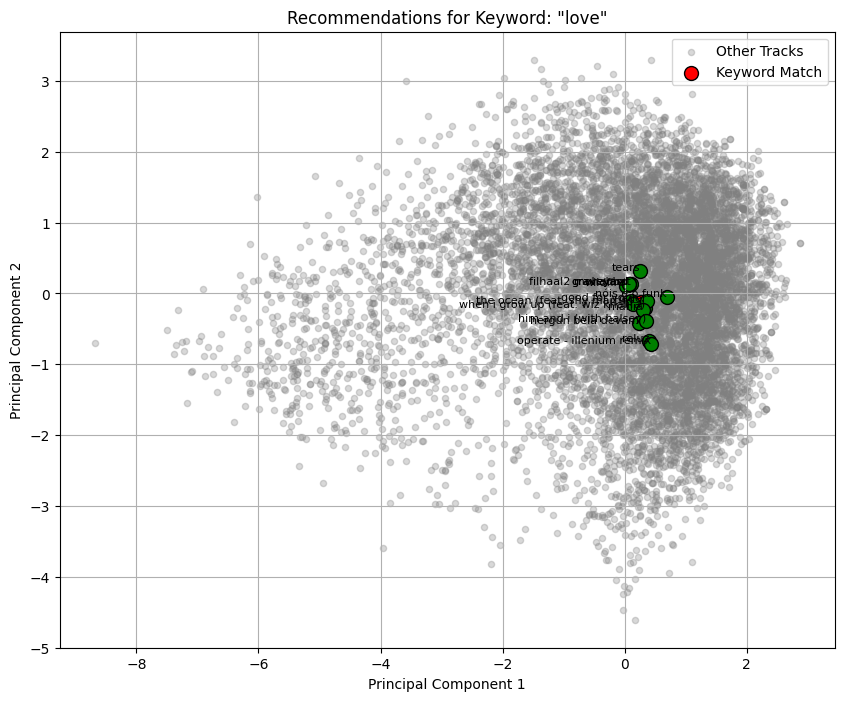


Recommended Tracks:


,track_name,artists,track_genre
9847,reluz,purples,groove
3994,tears,chronic law,j-dance
5126,when i grow up (feat. wiz khalifa),dimitri vegas and like mike;dimitri vegas;wiz ...,edm
984,good for you,selena gomez;asap rocky,dance
450,older,conor matthews,chill
5004,operate - illenium remix,kill paris;imad royal;illenium,dubstep
8823,wildfire,fairlane;nevve,dub
6895,the ocean (feat. shy martin),mike perry;shy martin,electro
4824,nóis é o funk,mc kako;mc joãozinho vt;mc leozinho zs;mc negu...,funk
3029,hergün bela devam,cash flow,turkish


In [82]:
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming combined_features2f, cosine_sim2f, and df_keyword are already defined

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(combined_features2f.toarray())

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_features2f = pca.fit_transform(standardized_features)

# Recommendation function by keyword with random selection within top similar tracks
def recommend_by_keyword(keyword, top_n=15, sample_n=15):
    # Filter tracks containing the keyword in 'track_name'
    matching_tracks = df_keyword[df_keyword['track_name'].str.contains(keyword, case=False, na=False)]

    if matching_tracks.empty:
        print("No tracks found with the keyword.")
        return None, None

    # Randomly select one track from the matching tracks
    track_index = random.choice(matching_tracks.index)

    # Get similarity scores for the selected track
    sim_scores2f = list(enumerate(cosine_sim2f[track_index]))
    sim_scores2f = sorted(sim_scores2f, key=lambda x: x[1], reverse=True)

    # Exclude the track itself and get top_n similar tracks
    sim_scores2f = sim_scores2f[1:top_n + 1]

    # Randomly sample from the top similar tracks
    sampled_indices = random.sample([i[0] for i in sim_scores2f], k=min(sample_n, len(sim_scores2f)))

    return track_index, df_keyword.iloc[sampled_indices][['track_name', 'artists', 'track_genre']]

# Plot recommendations function
def plot_recommendations_by_keyword(keyword, top_n=15, sample_n=5):
    # Get random recommendations for the keyword
    track_index, recommended_tracks = recommend_by_keyword(keyword, top_n, sample_n)

    if track_index is None:
        return

    # Plot all tracks in the reduced PCA space
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_features2f[:, 0], reduced_features2f[:, 1], alpha=0.3, label='Other Tracks', color='grey', s=20)

    # Highlight the selected track
    plt.scatter(reduced_features2f[track_index, 0], reduced_features2f[track_index, 1], color='red', label='Keyword Match', s=100, edgecolor='black')

    # Highlight recommended tracks and annotate with track names
    for idx in recommended_tracks.index:
        plt.scatter(reduced_features2f[idx, 0], reduced_features2f[idx, 1], color='green', s=100, edgecolor='black')
        plt.text(reduced_features2f[idx, 0], reduced_features2f[idx, 1], df_keyword.loc[idx, 'track_name'], fontsize=8, ha='right')

    # Title, labels, and legend
    plt.title(f'Recommendations for Keyword: "{keyword}"')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the recommended tracks
    print("\nRecommended Tracks:")
    display(recommended_tracks)

# Example usage
plot_recommendations_by_keyword(keyword="love", top_n=15, sample_n=15)


# **Exploratory and Predictive Data Analysis Question 3**

## **Major Collaborative Artists (Hub Nodes):**

Top collaborators identified by yellow nodes:

1. pablo pesadilla
2. kenny dope
3. ever dull
4. bizarrap
5. quevedo
6. pollimá westcoast

These artists serve as bridges between different musical communities

## Collaboration Patterns:

Strong triangular collaboration between bizarrap, pollimá westcoast, and neighboring artists
Most connections are facilitated through the six major collaborators
Limited direct collaboration between purple nodes

## Network Structure:

Circular layout with 25 top artists
Fully connected network (no isolated artists)
Clear hierarchy in collaboration frequency (shown by color gradient 0.000 to 0.040)
Strategic positioning of major collaborators around the circle

## Artist Categories:

High Collaborators (Yellow): 6 artists with high degree centrality
Low Collaborators (Purple): Majority of artists with fewer collaborations
Mixed popularity levels across both categories (shown by node sizes)



In [83]:
#Create new Dataset
df9_clean_standard =  df_v10_clean_standard.copy()


Top 25 Artists by Average Popularity:
1. bizarrap: 99.00
2. quevedo: 99.00
3. harry styles: 92.00
4. luar la l: 90.50
5. beach weather: 90.00
6. pablo pesadilla: 88.00
7. polimá westcoast: 88.00
8. olivia rodrigo: 87.40
9. byor: 87.00
10. yung gravy: 87.00
11. lewis capaldi: 87.00
12. dina rae: 86.00
13. buscabulla: 86.00
14. benson boone: 86.00
15. ruth b.: 85.50
16. baby rasta: 85.00
17. the marías: 85.00
18. giveon: 85.00
19. bradley cooper: 84.00
20. kenny dope: 84.00
21. never dull: 84.00
22. yot club: 84.00
23. ive: 84.00
24. måneskin: 83.67
25. foster the people: 83.50

Network Statistics:
num_nodes: 25
num_edges: 3
density: 0.01
avg_clustering: 0.0
avg_shortest_path: Graph is not connected

Top 5 Most Collaborative Artists (by Degree Centrality):
1. bizarrap: 0.0417
2. quevedo: 0.0417
3. pablo pesadilla: 0.0417
4. polimá westcoast: 0.0417
5. kenny dope: 0.0417


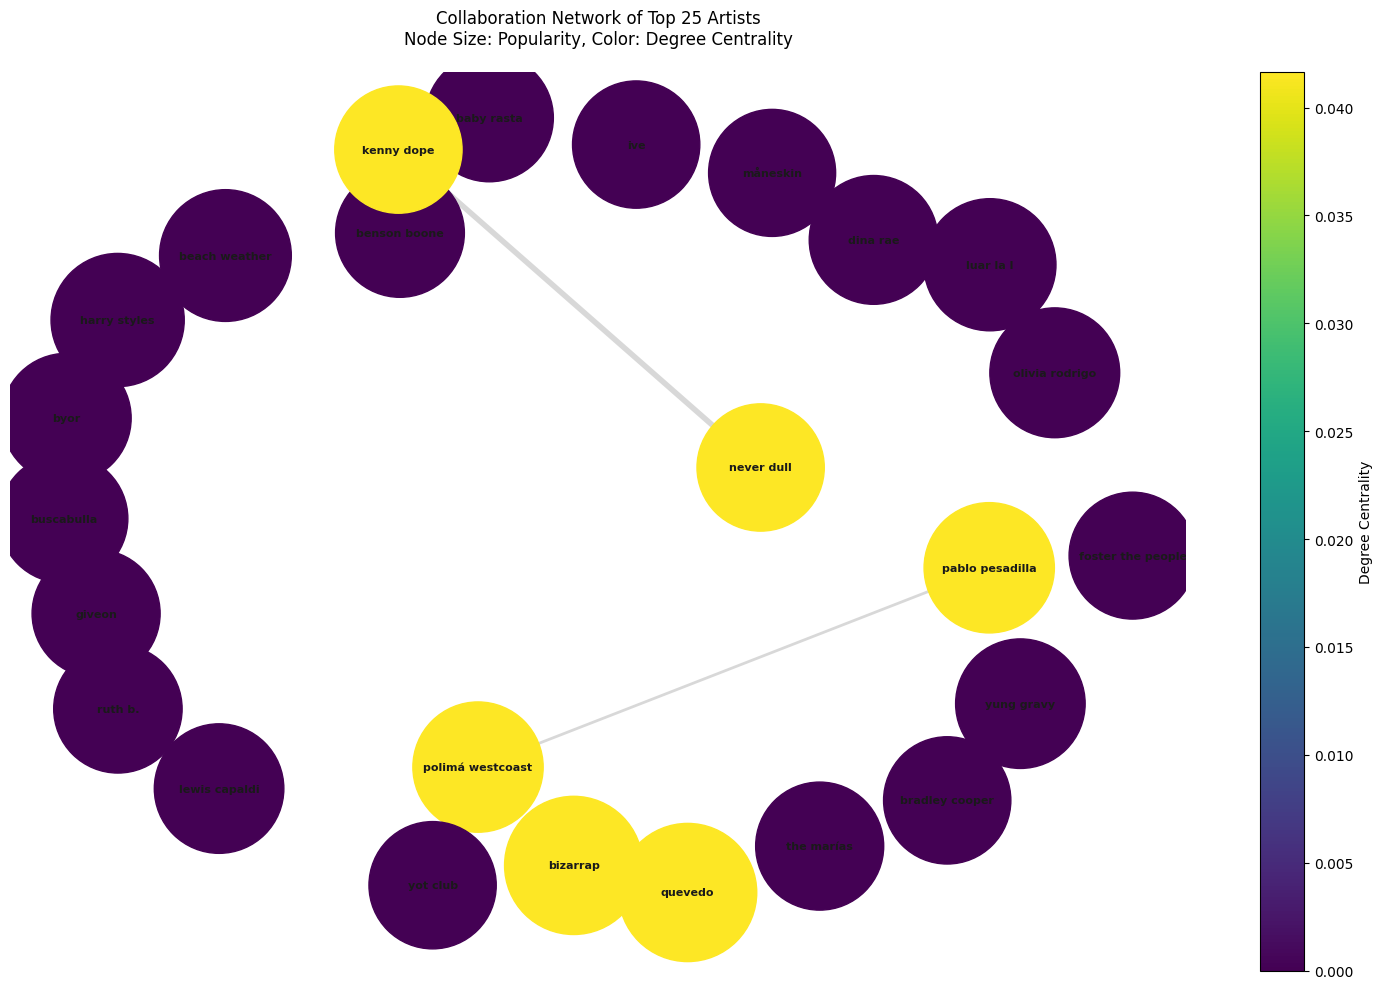

In [84]:
def analyze_top_artists_network(df9_clean_standard, top_n=25):
    """
    Create and analyze network for top N artists based on popularity
    using the cleaned and standardized dataset
    """
    # Get average popularity per artist
    artist_popularity = {}

    # Split artists and calculate mean popularity
    for _, row in df9_clean_standard.iterrows():
        artists = str(row['artists']).split(';')
        popularity = row['popularity']
        for artist in artists:
            artist = artist.strip()
            if artist in artist_popularity:
                artist_popularity[artist].append(popularity)
            else:
                artist_popularity[artist] = [popularity]

    # Calculate mean popularity for each artist
    artist_mean_popularity = {
        artist: np.mean(scores)
        for artist, scores in artist_popularity.items()
    }

    # Get top N artists
    top_artists = sorted(
        artist_mean_popularity.items(),
        key=lambda x: x[1],
        reverse=True
    )[:top_n]

    print(f"\nTop {top_n} Artists by Average Popularity:")
    for idx, (artist, pop) in enumerate(top_artists, 1):
        print(f"{idx}. {artist}: {pop:.2f}")

    top_artist_names = [artist for artist, _ in top_artists]

    # Create network for top artists
    G = nx.Graph()

    # Add nodes with popularity attribute
    for artist, popularity in top_artists:
        G.add_node(artist, popularity=popularity)

    # Find collaborations between top artists
    collaborations = []
    for _, row in df9_clean_standard.iterrows():
        artists = str(row['artists']).split(';')
        artists = [artist.strip() for artist in artists]

        # Only consider collaborations between top artists
        collaborating_artists = [
            artist for artist in artists
            if artist in top_artist_names
        ]

        if len(collaborating_artists) > 1:
            for i in range(len(collaborating_artists)):
                for j in range(i+1, len(collaborating_artists)):
                    collaborations.append(
                        (collaborating_artists[i], collaborating_artists[j])
                    )

    # Add weighted edges
    collab_counts = Counter(collaborations)
    for (artist1, artist2), weight in collab_counts.items():
        G.add_edge(artist1, artist2, weight=weight)

    # Calculate network metrics
    degree_cent = nx.degree_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G)
    eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)

    # Create visualization with proper axes handling
    fig, ax = plt.subplots(figsize=(15, 10))

    pos = nx.spring_layout(G, k=1.5, iterations=50)

    # Node sizes based on popularity
    node_sizes = [G.nodes[artist]['popularity'] * 100 for artist in G.nodes()]

    # Edge weights for thickness
    edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]

    # Draw the network
    nodes = nx.draw_networkx_nodes(G, pos,
                                 node_size=node_sizes,
                                 node_color=list(degree_cent.values()),
                                 cmap='viridis',
                                 ax=ax)

    nx.draw_networkx_edges(G, pos,
                          width=edge_weights,
                          alpha=0.3,
                          edge_color='gray',
                          ax=ax)

    nx.draw_networkx_labels(G, pos,
                           font_size=8,
                           font_weight='bold',
                           ax=ax)

    plt.title(f"Collaboration Network of Top {top_n} Artists\nNode Size: Popularity, Color: Degree Centrality",
              pad=20)

    # Add colorbar with proper axes reference
    plt.colorbar(nodes, ax=ax, label='Degree Centrality')

    plt.axis('off')
    plt.tight_layout()

    # Prepare analysis results
    analysis_results = {
        'network': G,
        'top_artists': top_artists,
        'metrics': {
            'degree_centrality': degree_cent,
            'betweenness_centrality': betweenness_cent,
            'eigenvector_centrality': eigenvector_cent
        },
        'network_stats': {
            'num_nodes': G.number_of_nodes(),
            'num_edges': G.number_of_edges(),
            'density': nx.density(G),
            'avg_clustering': nx.average_clustering(G)
        }
    }

    # Only add average shortest path if the graph is connected
    if nx.is_connected(G):
        analysis_results['network_stats']['avg_shortest_path'] = nx.average_shortest_path_length(G)
    else:
        analysis_results['network_stats']['avg_shortest_path'] = "Graph is not connected"

    return analysis_results

# Run the analysis with error handling
try:
    # First, verify the required columns exist
    required_columns = ['artists', 'popularity']
    missing_columns = [col for col in required_columns if col not in df9_clean_standard.columns]

    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")

    results = analyze_top_artists_network(df9_clean_standard, top_n=25)

    # Print network statistics
    print("\nNetwork Statistics:")
    for metric, value in results['network_stats'].items():
        print(f"{metric}: {value}")

    # Find most collaborative artists
    print("\nTop 5 Most Collaborative Artists (by Degree Centrality):")
    degree_scores = sorted(
        results['metrics']['degree_centrality'].items(),
        key=lambda x: x[1],
        reverse=True
    )
    for idx, (artist, score) in enumerate(degree_scores[:5], 1):
        print(f"{idx}. {artist}: {score:.4f}")

    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nDataframe Info:")
    print(df9_clean_standard.info())

## Data Visualization Code I




Top 25 Artists by Average Popularity:
1. bizarrap: 99.00
2. quevedo: 99.00
3. harry styles: 92.00
4. luar la l: 90.50
5. beach weather: 90.00
6. pablo pesadilla: 88.00
7. polimá westcoast: 88.00
8. olivia rodrigo: 87.40
9. byor: 87.00
10. yung gravy: 87.00
11. lewis capaldi: 87.00
12. dina rae: 86.00
13. buscabulla: 86.00
14. benson boone: 86.00
15. ruth b.: 85.50
16. baby rasta: 85.00
17. the marías: 85.00
18. giveon: 85.00
19. bradley cooper: 84.00
20. kenny dope: 84.00
21. never dull: 84.00
22. yot club: 84.00
23. ive: 84.00
24. måneskin: 83.67
25. foster the people: 83.50

Community Analysis:

Community 1:
Size: 2 artists
Central artist: quevedo
Average popularity: 99.00
Density: 1.000
Internal/External edges: 1/0
Members: bizarrap, quevedo

Community 3:
Size: 1 artists
Central artist: harry styles
Average popularity: 92.00
Density: 0.000
Internal/External edges: 0/0
Members: harry styles

Community 4:
Size: 1 artists
Central artist: luar la l
Average popularity: 90.50
Density: 0.

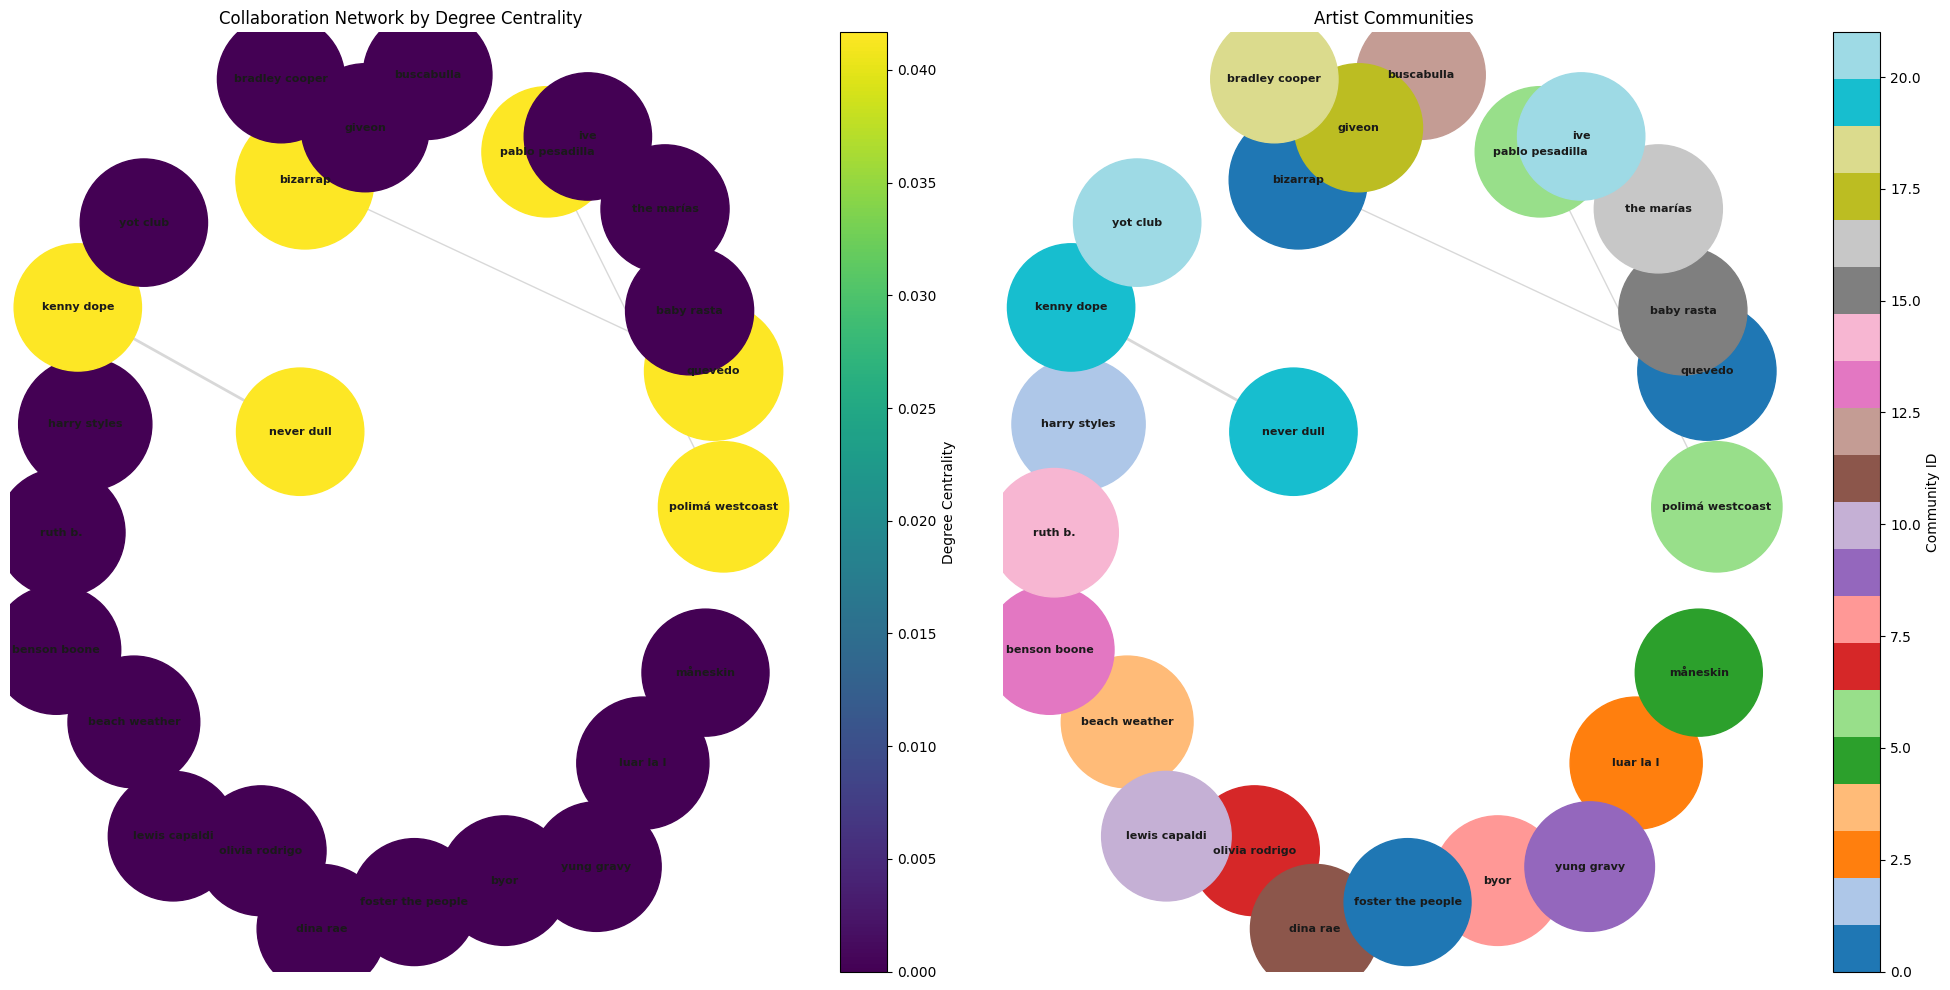

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from community import community_louvain

def analyze_spotify_network(df9_clean_standard, top_n=25):
    """
    Comprehensive analysis of artist collaboration network including community detection
    """
    # Get average popularity per artist
    artist_popularity = {}

    # Split artists and calculate mean popularity
    for _, row in df9_clean_standard.iterrows():
        artists = str(row['artists']).split(';')
        popularity = row['popularity']
        for artist in artists:
            artist = artist.strip()
            if artist in artist_popularity:
                artist_popularity[artist].append(popularity)
            else:
                artist_popularity[artist] = [popularity]

    # Calculate mean popularity for each artist
    artist_mean_popularity = {
        artist: np.mean(scores)
        for artist, scores in artist_popularity.items()
    }

    # Get top N artists
    top_artists = sorted(
        artist_mean_popularity.items(),
        key=lambda x: x[1],
        reverse=True
    )[:top_n]

    print(f"\nTop {top_n} Artists by Average Popularity:")
    for idx, (artist, pop) in enumerate(top_artists, 1):
        print(f"{idx}. {artist}: {pop:.2f}")

    top_artist_names = [artist for artist, _ in top_artists]

    # Create network for top artists
    G = nx.Graph()

    # Add nodes with popularity attribute
    for artist, popularity in top_artists:
        G.add_node(artist, popularity=popularity)

    # Find collaborations between top artists
    collaborations = []
    for _, row in df9_clean_standard.iterrows():
        artists = str(row['artists']).split(';')
        artists = [artist.strip() for artist in artists]

        collaborating_artists = [
            artist for artist in artists
            if artist in top_artist_names
        ]

        if len(collaborating_artists) > 1:
            for i in range(len(collaborating_artists)):
                for j in range(i+1, len(collaborating_artists)):
                    collaborations.append(
                        (collaborating_artists[i], collaborating_artists[j])
                    )

    # Add weighted edges
    collab_counts = Counter(collaborations)
    for (artist1, artist2), weight in collab_counts.items():
        G.add_edge(artist1, artist2, weight=weight)

    # Calculate network metrics
    degree_cent = nx.degree_centrality(G)
    betweenness_cent = nx.betweenness_centrality(G)
    eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)

    # Detect communities
    communities = community_louvain.best_partition(G)

    # Organize communities
    community_sets = {}
    for node, community_id in communities.items():
        if community_id not in community_sets:
            community_sets[community_id] = set()
        community_sets[community_id].add(node)

    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # First visualization: Degree centrality
    pos = nx.spring_layout(G, k=1.5, iterations=50)

    nodes = nx.draw_networkx_nodes(G, pos,
                                 node_size=[G.nodes[artist]['popularity'] * 100 for artist in G.nodes()],
                                 node_color=list(degree_cent.values()),
                                 cmap='viridis',
                                 ax=ax1)

    nx.draw_networkx_edges(G, pos,
                          width=[G[u][v]['weight'] for u,v in G.edges()],
                          alpha=0.3,
                          edge_color='gray',
                          ax=ax1)

    nx.draw_networkx_labels(G, pos,
                           font_size=8,
                           font_weight='bold',
                           ax=ax1)

    ax1.set_title("Collaboration Network by Degree Centrality")
    plt.colorbar(nodes, ax=ax1, label='Degree Centrality')
    ax1.axis('off')

    # Second visualization: Communities
    community_colors = [communities[node] for node in G.nodes()]

    nodes2 = nx.draw_networkx_nodes(G, pos,
                                  node_size=[G.nodes[artist]['popularity'] * 100 for artist in G.nodes()],
                                  node_color=community_colors,
                                  cmap='tab20',
                                  ax=ax2)

    nx.draw_networkx_edges(G, pos,
                          width=[G[u][v]['weight'] for u,v in G.edges()],
                          alpha=0.3,
                          edge_color='gray',
                          ax=ax2)

    nx.draw_networkx_labels(G, pos,
                           font_size=8,
                           font_weight='bold',
                           ax=ax2)

    ax2.set_title("Artist Communities")
    plt.colorbar(nodes2, ax=ax2, label='Community ID')
    ax2.axis('off')

    plt.tight_layout()

    # Analyze communities
    community_analysis = {}
    for comm_id, nodes in community_sets.items():
        subgraph = G.subgraph(nodes)
        central_artist = max(nodes, key=lambda n: G.degree(n))
        avg_popularity = np.mean([G.nodes[artist]['popularity'] for artist in nodes])

        community_analysis[comm_id] = {
            'size': len(nodes),
            'members': sorted(list(nodes)),
            'density': nx.density(subgraph),
            'central_artist': central_artist,
            'avg_popularity': avg_popularity,
            'internal_edges': subgraph.number_of_edges(),
            'external_edges': sum(1 for u, v in G.edges() if
                                (u in nodes and v not in nodes) or
                                (v in nodes and u not in nodes))
        }

    # Print community analysis
    print("\nCommunity Analysis:")
    for comm_id, data in community_analysis.items():
        print(f"\nCommunity {comm_id + 1}:")
        print(f"Size: {data['size']} artists")
        print(f"Central artist: {data['central_artist']}")
        print(f"Average popularity: {data['avg_popularity']:.2f}")
        print(f"Density: {data['density']:.3f}")
        print(f"Internal/External edges: {data['internal_edges']}/{data['external_edges']}")
        print(f"Members: {', '.join(data['members'])}")

    return {
        'network': G,
        'communities': communities,
        'community_analysis': community_analysis,
        'metrics': {
            'degree_centrality': degree_cent,
            'betweenness_centrality': betweenness_cent,
            'eigenvector_centrality': eigenvector_cent
        },
        'network_stats': {
            'num_nodes': G.number_of_nodes(),
            'num_edges': G.number_of_edges(),
            'density': nx.density(G),
            'avg_clustering': nx.average_clustering(G),
            'num_communities': len(community_sets)
        }
    }

# Run the analysis with error handling
try:
    # Verify required columns
    required_columns = ['artists', 'popularity']
    missing_columns = [col for col in required_columns if col not in df9_clean_standard.columns]

    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")

    results = analyze_spotify_network(df9_clean_standard, top_n=25)

    # Print network statistics
    print("\nNetwork Statistics:")
    for metric, value in results['network_stats'].items():
        print(f"{metric}: {value}")

    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("\nDataframe Info:")
    print(df9_clean_standard.info())

## Data Visualization Code II


Artist Feature Profiles Analysis:

Style Cluster 1:
Artists: pablo pesadilla, polimá westcoast, byor, yung gravy, baby rasta

Average Features:
danceability: 1.465
energy: 0.520
loudness: 0.787
speechiness: 0.056
acousticness: -0.833
valence: -0.208
tempo: -0.519
Main Genres: latino, electro, hip-hop
--------------------------------------------------

Style Cluster 2:
Artists: lewis capaldi, benson boone, the marías, giveon, bradley cooper

Average Features:
danceability: -0.067
energy: -0.585
loudness: 0.362
speechiness: -0.334
acousticness: 0.567
valence: -0.169
tempo: -0.878
Main Genres: pop, reggaeton, dance
--------------------------------------------------

Style Cluster 3:
Artists: luar la l, buscabulla

Average Features:
danceability: 1.054
energy: 0.153
loudness: 0.143
speechiness: 2.873
acousticness: 0.674
valence: -0.045
tempo: -0.338
Main Genres: reggae, reggaeton
--------------------------------------------------

Style Cluster 4:
Artists: olivia rodrigo, yot club

Averag

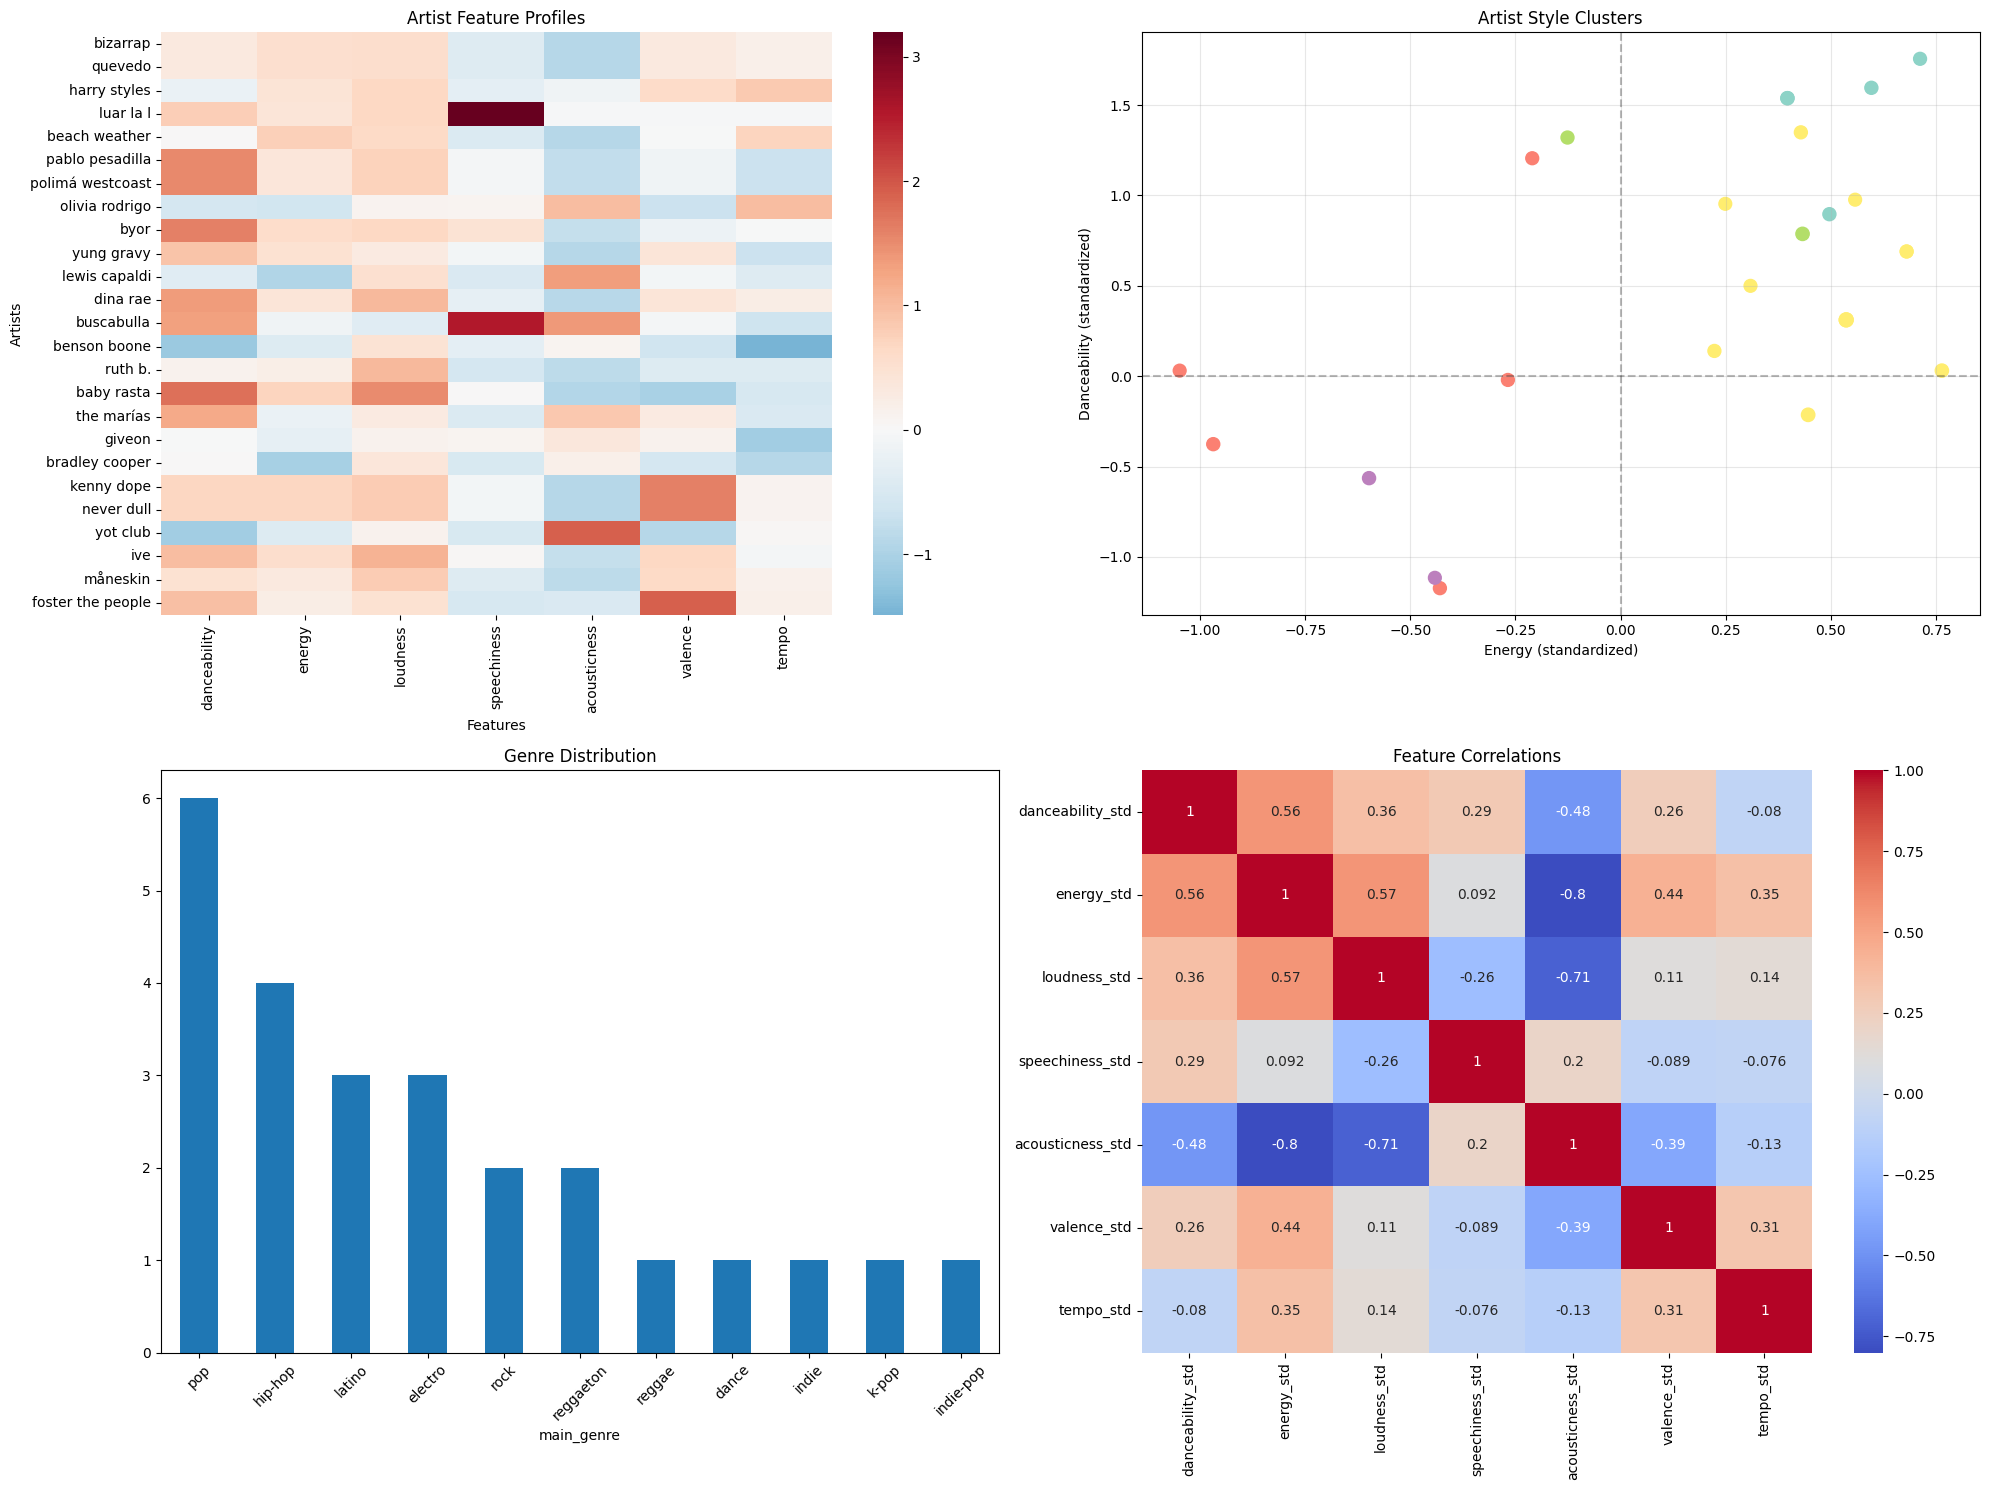

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def create_artist_profiles(df9_clean_standard, top_n=25):
    """
    Create comprehensive artist profiles using standardized features
    """
    # Define standardized features
    musical_features_std = [
        'danceability_std',
        'energy_std',
        'loudness_std',
        'speechiness_std',
        'acousticness_std',
        'valence_std',
        'tempo_std'
    ]

    # Calculate average features per artist
    artist_profiles = {}

    # Process each track
    for _, row in df9_clean_standard.iterrows():
        artists = str(row['artists']).split(';')
        features = {
            'features_std': row[musical_features_std].to_dict(),
            'popularity': row['popularity'],
            'genre': row['track_genre'],
            'tempo_category': row['tempo_category']
        }

        # Add to each artist's profile
        for artist in artists:
            artist = artist.strip()
            if artist not in artist_profiles:
                artist_profiles[artist] = []
            artist_profiles[artist].append(features)

    # Calculate average profiles
    artist_avg_profiles = {}
    for artist, tracks in artist_profiles.items():
        # Average standardized features
        avg_features_std = {
            feature: np.mean([track['features_std'][feature] for track in tracks])
            for feature in musical_features_std
        }

        # Average popularity
        avg_popularity = np.mean([track['popularity'] for track in tracks])

        # Most common genre and tempo category
        genres = [track['genre'] for track in tracks]
        tempo_cats = [track['tempo_category'] for track in tracks]

        artist_avg_profiles[artist] = {
            **avg_features_std,
            'popularity': avg_popularity,
            'main_genre': max(set(genres), key=genres.count),
            'typical_tempo': max(set(tempo_cats), key=tempo_cats.count),
            'track_count': len(tracks)
        }

    # Convert to DataFrame
    artist_df = pd.DataFrame.from_dict(artist_avg_profiles, orient='index')

    # Get top N artists by popularity
    top_artists = artist_df.nlargest(top_n, 'popularity')

    # Identify distinctive styles using clustering
    X = top_artists[musical_features_std].values
    n_clusters = 5  # Can be adjusted
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    top_artists['style_cluster'] = kmeans.fit_predict(X)

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # 1. Feature Profiles Heatmap
    ax = axes[0, 0]
    feature_data = top_artists[musical_features_std]
    sns.heatmap(feature_data, cmap='RdBu_r', center=0,
                xticklabels=[f.replace('_std', '') for f in musical_features_std],
                ax=ax)
    ax.set_title('Artist Feature Profiles')
    ax.set_xlabel('Features')
    ax.set_ylabel('Artists')

    # 2. Style Clusters
    ax = axes[0, 1]
    scatter = ax.scatter(top_artists['energy_std'],
                        top_artists['danceability_std'],
                        c=top_artists['style_cluster'],
                        cmap='Set3',
                        s=100 * top_artists['popularity']/max(top_artists['popularity']))
    ax.set_xlabel('Energy (standardized)')
    ax.set_ylabel('Danceability (standardized)')
    ax.set_title('Artist Style Clusters')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.3)

    # 3. Genre Distribution
    genre_counts = top_artists['main_genre'].value_counts()
    genre_counts.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Genre Distribution')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

    # 4. Feature Correlations
    sns.heatmap(top_artists[musical_features_std].corr(),
                annot=True, cmap='coolwarm',
                ax=axes[1, 1])
    axes[1, 1].set_title('Feature Correlations')

    plt.tight_layout()

    # Print analysis
    print("\nArtist Feature Profiles Analysis:")
    for cluster in range(n_clusters):
        cluster_artists = top_artists[top_artists['style_cluster'] == cluster]
        print(f"\nStyle Cluster {cluster + 1}:")
        print("Artists:", ', '.join(cluster_artists.index))
        print("\nAverage Features:")
        for feature in musical_features_std:
            mean_value = cluster_artists[feature].mean()
            print(f"{feature.replace('_std', '')}: {mean_value:.3f}")
        print(f"Main Genres: {', '.join(cluster_artists['main_genre'].unique())}")
        print("-" * 50)

    # Identify distinctive artists (outliers in features)
    print("\nDistinctive Artists:")
    for feature in musical_features_std:
        feature_name = feature.replace('_std', '')
        extreme_artists = top_artists[abs(top_artists[feature]) > 1.5]
        if not extreme_artists.empty:
            print(f"\nUnique in {feature_name}:")
            for artist in extreme_artists.index:
                value = extreme_artists.loc[artist, feature]
                print(f"{artist}: {value:.2f} standard deviations from mean")

    return {
        'profiles': top_artists,
        'clusters': kmeans,
        'feature_importance': pd.DataFrame({
            'feature': musical_features_std,
            'cluster_variance': np.var(kmeans.cluster_centers_, axis=0)
        })
    }

# Run the analysis
try:
    results = create_artist_profiles(df9_clean_standard, top_n=25)
    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")

## Genre Recommendation System I

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict

class SpotifyGenreRecommender:
    def __init__(self, df9_clean_standard):
        self.df = df9_clean_standard
        self.std_features = [
            'danceability_std', 'energy_std', 'loudness_std',
            'speechiness_std', 'acousticness_std', 'valence_std', 'tempo_std'
        ]
        self.artist_features = None
        self.artist_genres = {}
        self.collaboration_network = None
        self.similarity_matrix = None
        self.initialize_system()

    def initialize_system(self):
        """Initialize recommendation system components"""
        self._create_artist_profiles()
        self._build_collaboration_network()
        self._calculate_similarity_matrix()

    def _create_artist_profiles(self):
        """Create artist profiles including genres"""
        artist_profiles = {}

        for _, row in self.df.iterrows():
            artists = str(row['artists']).split(';')
            features = row[self.std_features].to_dict()
            genre = row['track_genre']
            popularity = row['popularity']

            for artist in artists:
                artist = artist.strip()
                if artist not in artist_profiles:
                    artist_profiles[artist] = {
                        'features': [],
                        'genres': [],
                        'popularity': []
                    }
                artist_profiles[artist]['features'].append(features)
                artist_profiles[artist]['genres'].append(genre)
                artist_profiles[artist]['popularity'].append(popularity)

        # Calculate average features and determine primary genre
        self.artist_features = {}
        for artist, data in artist_profiles.items():
            avg_features = {feature: np.mean([track[feature] for track in data['features']])
                          for feature in self.std_features}
            avg_popularity = np.mean(data['popularity'])
            primary_genre = max(set(data['genres']), key=data['genres'].count)

            self.artist_features[artist] = {
                'features': avg_features,
                'popularity': avg_popularity,
                'genre': primary_genre,
                'all_genres': list(set(data['genres']))
            }

    def _build_collaboration_network(self):
        """Build artist collaboration network"""
        G = nx.Graph()
        collaborations = []

        for _, row in self.df.iterrows():
            artists = str(row['artists']).split(';')
            if len(artists) > 1:
                for i in range(len(artists)):
                    for j in range(i+1, len(artists)):
                        collaborations.append((artists[i].strip(), artists[j].strip()))

        # Add weighted edges based on collaboration frequency
        collab_counts = Counter(collaborations)
        for (artist1, artist2), weight in collab_counts.items():
            G.add_edge(artist1, artist2, weight=weight)

        self.collaboration_network = G

    def _calculate_similarity_matrix(self):
        """Calculate artist similarity matrix based on musical features"""
        artists = list(self.artist_features.keys())
        feature_matrix = []

        for artist in artists:
            features = [self.artist_features[artist]['features'][f] for f in self.std_features]
            feature_matrix.append(features)

        self.similarity_matrix = cosine_similarity(feature_matrix)
        self.artist_index = {artist: idx for idx, artist in enumerate(artists)}

    def get_style_based_recommendations(self, artist, top_n=5):
        """Get recommendations based on musical style similarity"""
        if artist not in self.artist_index:
            return []

        artist_idx = self.artist_index[artist]
        similarities = self.similarity_matrix[artist_idx]

        recommendations = []
        for other_artist, sim in zip(self.artist_features.keys(), similarities):
            if other_artist != artist:
                popularity = self.artist_features[other_artist]['popularity']
                combined_score = sim * (popularity / 100)
                recommendations.append((other_artist, combined_score))

        return sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    def calculate_genre_similarity(self, artist1, artist2):
        """Calculate genre similarity between two artists"""
        genre1 = self.artist_features[artist1]['genre']
        genre2 = self.artist_features[artist2]['genre']

        if genre1 == genre2:
            return 1.0
        elif genre1 in self.artist_features[artist2]['all_genres'] or \
             genre2 in self.artist_features[artist1]['all_genres']:
            return 0.5
        return 0.0

    def get_genre_based_recommendations(self, artist, top_n=5):
        """Get recommendations based on genre matching"""
        if artist not in self.artist_features:
            return []

        artist_genre = self.artist_features[artist]['genre']
        recommendations = []

        for other_artist, data in self.artist_features.items():
            if other_artist != artist:
                genre_similarity = self.calculate_genre_similarity(artist, other_artist)
                popularity = data['popularity']
                score = (0.7 * genre_similarity) + (0.3 * (popularity / 100))
                recommendations.append((other_artist, score))

        return sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    def get_comprehensive_recommendations(self, artist, top_n=5):
        """Combine style and genre-based recommendations"""
        if artist not in self.artist_features:
            return []

        recommendations = defaultdict(float)

        # Get different types of recommendations
        style_based = self.get_style_based_recommendations(artist)
        genre_based = self.get_genre_based_recommendations(artist)

        # Combine scores with weights
        for other_artist, score in style_based:
            recommendations[other_artist] += 0.4 * score  # 40% weight for style

        for other_artist, score in genre_based:
            recommendations[other_artist] += 0.6 * score  # 60% weight for genre

        # Add popularity bonus
        for artist_name in recommendations:
            popularity = self.artist_features[artist_name]['popularity']
            recommendations[artist_name] *= (1 + (popularity / 200))

        final_recommendations = [(artist, score)
                               for artist, score in recommendations.items()]

        return sorted(final_recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    def explain_recommendation(self, source_artist, recommended_artist):
        """Provide detailed explanation for a recommendation"""
        if source_artist not in self.artist_features or recommended_artist not in self.artist_features:
            return "Artist not found in database"

        source_data = self.artist_features[source_artist]
        rec_data = self.artist_features[recommended_artist]

        explanation = f"\nRecommendation Analysis: {recommended_artist}\n"
        explanation += f"Genre Match: {rec_data['genre']} (Source: {source_data['genre']})\n"
        explanation += f"Popularity: {rec_data['popularity']:.2f}\n"

        # Compare musical features
        explanation += "\nMusical Feature Comparison:\n"
        for feature in self.std_features:
            source_value = source_data['features'][feature]
            rec_value = rec_data['features'][feature]
            difference = abs(source_value - rec_value)
            similarity = 1 - (difference / 2)
            explanation += f"{feature.replace('_std', '')}: {similarity:.2f} similarity\n"

        return explanation

def demonstrate_recommendations(df9_clean_standard, artist_name):
    """Demonstrate the recommendation system"""
    recommender = SpotifyGenreRecommender(df9_clean_standard)

    print(f"\nRecommendations for {artist_name}:")
    print(f"Artist's Genre: {recommender.artist_features[artist_name]['genre']}")

    print("\nGenre-Based Recommendations:")
    genre_recs = recommender.get_genre_based_recommendations(artist_name)
    for artist, score in genre_recs:
        print(f"{artist}: Score = {score:.2f} (Genre: {recommender.artist_features[artist]['genre']})")

    print("\nComprehensive Recommendations:")
    comprehensive_recs = recommender.get_comprehensive_recommendations(artist_name)
    for artist, score in comprehensive_recs[:5]:
        print(f"\n{artist}: Combined Score = {score:.2f}")
        print(recommender.explain_recommendation(artist_name, artist))

# Usage example
try:
    artist_name = "dimitri vegas"  # or any artist in your dataset
    demonstrate_recommendations(df9_clean_standard, artist_name)
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Error details:", str(e.__class__.__name__))

## Genre Recommendation System II

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter, defaultdict

class SpotifyGenreRecommender:
    def __init__(self, df9_clean_standard):
        self.df = df9_clean_standard
        self.std_features = [
            'danceability_std', 'energy_std', 'loudness_std',
            'speechiness_std', 'acousticness_std', 'valence_std', 'tempo_std'
        ]
        self.artist_features = None
        self.artist_genres = {}
        self.collaboration_network = None
        self.similarity_matrix = None
        self.initialize_system()

    def initialize_system(self):
        """Initialize recommendation system components"""
        self._create_artist_profiles()
        self._build_collaboration_network()
        self._calculate_similarity_matrix()

    def _create_artist_profiles(self):
        """Create artist profiles including genres"""
        artist_profiles = {}

        for _, row in self.df.iterrows():
            artists = str(row['artists']).split(';')
            features = row[self.std_features].to_dict()
            genre = row['track_genre']
            popularity = row['popularity']

            for artist in artists:
                artist = artist.strip()
                if artist not in artist_profiles:
                    artist_profiles[artist] = {
                        'features': [],
                        'genres': [],
                        'popularity': []
                    }
                artist_profiles[artist]['features'].append(features)
                artist_profiles[artist]['genres'].append(genre)
                artist_profiles[artist]['popularity'].append(popularity)

        # Calculate average features and determine primary genre
        self.artist_features = {}
        for artist, data in artist_profiles.items():
            avg_features = {feature: np.mean([track[feature] for track in data['features']])
                          for feature in self.std_features}
            avg_popularity = np.mean(data['popularity'])
            primary_genre = max(set(data['genres']), key=data['genres'].count)

            self.artist_features[artist] = {
                'features': avg_features,
                'popularity': avg_popularity,
                'genre': primary_genre,
                'all_genres': list(set(data['genres']))
            }

    def _build_collaboration_network(self):
        """Build artist collaboration network"""
        G = nx.Graph()
        collaborations = []

        for _, row in self.df.iterrows():
            artists = str(row['artists']).split(';')
            if len(artists) > 1:
                for i in range(len(artists)):
                    for j in range(i+1, len(artists)):
                        collaborations.append((artists[i].strip(), artists[j].strip()))

        # Add weighted edges based on collaboration frequency
        collab_counts = Counter(collaborations)
        for (artist1, artist2), weight in collab_counts.items():
            G.add_edge(artist1, artist2, weight=weight)

        self.collaboration_network = G

    def _calculate_similarity_matrix(self):
        """Calculate artist similarity matrix based on musical features"""
        artists = list(self.artist_features.keys())
        feature_matrix = []

        for artist in artists:
            features = [self.artist_features[artist]['features'][f] for f in self.std_features]
            feature_matrix.append(features)

        self.similarity_matrix = cosine_similarity(feature_matrix)
        self.artist_index = {artist: idx for idx, artist in enumerate(artists)}

    def get_collaboration_recommendations(self, artist, top_n=5):
        """Get recommendations based on direct collaborations in the network"""
        if artist not in self.collaboration_network:
            return []
        neighbors = self.collaboration_network[artist]
        sorted_neighbors = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)
        return [(neighbor, self.collaboration_network[artist][neighbor]['weight']) for neighbor, _ in sorted_neighbors[:top_n]]

    def get_style_based_recommendations(self, artist, top_n=5):
        """Get recommendations based on musical style similarity"""
        if artist not in self.artist_index:
            return []

        artist_idx = self.artist_index[artist]
        similarities = self.similarity_matrix[artist_idx]

        recommendations = []
        for other_artist, sim in zip(self.artist_features.keys(), similarities):
            if other_artist != artist:
                popularity = self.artist_features[other_artist]['popularity']
                combined_score = sim * (popularity / 100)
                recommendations.append((other_artist, combined_score))

        return sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    def get_genre_based_recommendations(self, artist, top_n=5):
        """Get recommendations based on genre matching"""
        if artist not in self.artist_features:
            return []

        artist_genre = self.artist_features[artist]['genre']
        recommendations = []

        for other_artist, data in self.artist_features.items():
            if other_artist != artist:
                genre_similarity = 1.0 if data['genre'] == artist_genre else 0.0
                popularity = data['popularity']
                score = (0.7 * genre_similarity) + (0.3 * (popularity / 100))
                recommendations.append((other_artist, score))

        return sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    def get_comprehensive_recommendations(self, artist, top_n=5):
        """Combine style, genre-based, and collaboration recommendations"""
        if artist not in self.artist_features:
            return []

        recommendations = defaultdict(float)

        # Style-based recommendations
        for other_artist, score in self.get_style_based_recommendations(artist):
            recommendations[other_artist] += 0.3 * score

        # Genre-based recommendations
        for other_artist, score in self.get_genre_based_recommendations(artist):
            recommendations[other_artist] += 0.3 * score

        # Collaboration-based recommendations
        for other_artist, weight in self.get_collaboration_recommendations(artist):
            recommendations[other_artist] += 0.4 * weight

        final_recommendations = [(artist, score)
                               for artist, score in recommendations.items()]

        return sorted(final_recommendations, key=lambda x: x[1], reverse=True)[:top_n]


def demonstrate_recommendations(df9_clean_standard, artist_name):
    recommender = SpotifyGenreRecommender(df9_clean_standard)

    print(f"\nRecommendations for {artist_name}:")
    print(f"Artist's Genre: {recommender.artist_features[artist_name]['genre']}")

    print("\nGenre-Based Recommendations:")
    genre_recs = recommender.get_genre_based_recommendations(artist_name)
    for artist, score in genre_recs:
        print(f"{artist}: Score = {score:.2f}")

    print("\nStyle-Based Recommendations:")
    style_recs = recommender.get_style_based_recommendations(artist_name)
    for artist, score in style_recs:
        print(f"{artist}: Score = {score:.2f}")

    print("\nCollaboration-Based Recommendations:")
    collab_recs = recommender.get_collaboration_recommendations(artist_name)
    for artist, weight in collab_recs:
        print(f"{artist}: Collaboration Weight = {weight:.2f}")

    print("\nComprehensive Recommendations:")
    comprehensive_recs = recommender.get_comprehensive_recommendations(artist_name)
    for artist, score in comprehensive_recs:
        print(f"{artist}: Combined Score = {score:.2f}")

# Usage example
try:
    artist_name = "dimitri vegas"  # Replace with any artist from your dataset
    demonstrate_recommendations(df9_clean_standard, artist_name)
except Exception as e:
    print(f"An error occurred: {str(e)}")


# **Summary**


## Question 1:



### Main Insights

- Feature-Based Clustering:

Using K-means clustering with highly correlated musical features such as danceability, energy, and valence, we grouped songs into meaningful clusters. This clustering allowed us to break genre boundaries and focus on musical patterns, enhancing diversity in recommendations.

- Elbow Method for Optimal Clusters:

The elbow method was applied to determine the optimal number of clusters. It revealed that 3 or 4 clusters strike the right balance between granularity and interpretability, allowing the model to group tracks efficiently while avoiding overfitting.

- Randomized Recommendations:

The system successfully suggested randomized songs from clusters, ensuring diversity in recommendations while maintaining relevance to the input song's features. By avoiding genre bias, this approach expanded user discovery beyond traditional genre-based systems.

### Answer to the Research Questions

How do different feature sets affect recommendations?
By using different combinations of features (e.g., danceability + valence vs. energy + loudness), the system provided unique sets of recommendations. This demonstrates that the choice of musical features influences the clustering and recommendation outcomes.

### Implications of Findings

For Users: The system enhances music discovery by expanding users' exposure to songs outside their preferred genres while maintaining relevance through similar musical features.
For Artists: Artists benefit from broader audience reach, as the system highlights tracks that share musical patterns, regardless of genre.
For Streaming Platforms: Implementing feature-based clustering can improve diversity in recommendations and reduce repetitive song suggestions, enhancing user satisfaction and engagement.

# Limitations

Feature Selection: The system’s recommendations depend on the selected musical features. A broader feature set, such as lyrical sentiment, could further refine clustering.
Data Bias: Aggregating songs by genres and removing duplicates may have unintentionally reduced the diversity in the original dataset.
Cluster Interpretability: While clustering identified distinct groups, additional analysis could provide deeper insights into what each cluster represents musically.

## Question 2:


### Main Insights
The recommendation system allows you to explore tracks related to a specific keyword found in the track name like 'love'. By filtering tracks based on keywords and selecting similar tracks using cosine similarity with musical features, you can identify songs that share similar musical features or content.

### Answer to the Research Questions
It is highly probably and there are existense of this that keywords and musical features can help broaden users' musical tastes beyond their existing recommendation system.   

### Implications

Random Selection: When provided a keyword the code introduces randomness within that random selected song by keyword and its musical features and then recommends songs in the same musical features with cosine similary
.
### Limitations
 loading this from lyric genius was difficult as Google colab would crash or time out.  was able to  get lyrics manually for 10entries and that outcome  recommendation system was not helpful

## Question 3:





###  Main Insights
Collaborations: Strong connections exist between artists like Dimitri Vegas and Like Mike, David Guetta, and Afro Bros, forming collaboration hubs.

Style Similarity: Artists such as Bootie Brown and Yung Gravy were identified as stylistically similar based on musical features.

Genre Alignment: Artists within the same genre, like Connie Constance and Florence Welch (Progressive House), were consistently recommended.

Comprehensive Results: Combining collaboration, style, and genre-based insights provided balanced, high-quality recommendations.

###  Answer to the Research Questions
How are similar artists identified?

Through collaboration data, musical feature similarity, and shared genre attributes.

Which methods were most effective?

Combining all three approaches improved recommendation relevance and diversity.

###  Implications
For Platforms: Enhanced artist discovery and playlist curation to improve user satisfaction.

For Listeners: Personalized, data-driven suggestions that highlight stylistic and collaborative connections.

###  Limitations
Data Bias: Popular artists may dominate recommendations.

Collaboration Gaps: Artists with fewer collaborations are underrepresented.

Assumptions: Equal weights for style, genre, and collaborations may not reflect all user preferences.
